## Table of Contents

* [Executive Summary](#executive-summary)
* [Problem Description](#problem-description)
* [Data Description](#data-description)
* [Exploratory Data Analysis](#exploratory-data-analysis)
    * [Testing Dataset](#testing-dataset)
    * [Reinfection Dataset](#reinfection-dataset)
    * [Vaccination Dataset](#vaccination-dataset)
    * [Sentiment Dataset](#sentiment-dataset)
* [Feature Engineering](#feature-engineering)
* [Modeling](#modeling)
    * [Analysis 1: Factor Analysis](#analysis-1-Factor-Analysis)
        - [Factor Analysis Result Interpretations](#Factor-Analysis-Interpretations)
    * [Analysis 2: Effect Evaluation & Prediciting New COVID-19 Cases](#analysis-2-effect-evaluation-prediciting-new-COVID-19-Cases)
        - [Linear Regression Assumption Checks](#Linear-Regression-Assumption-Checks)
        - [Fitting Linear Regression Model](#Fitting-Linear-Regression-Model)
        - [Linear Regression Interpretations](#Linear-Regression-Interpretations)
        - [Time Series Forcasting - ARIMAX](#Time-Series-Forcasting-ARIMAX)
        - [Fitting ARIMAX Model](#Fitting-ARIMAX-Model)
        - [ARIMAX Model Interpretations](#ARIMAX-Model-Interpretations)
        - [ Cross-validation and Out-of-Sample Forecast](#Cross-validation-and-Out-of-Sample-Forecast)
* [Conclusion & Recommendations](#conclusion-recommendations)
* [References](#references)

<a id="executive-summary"></a>
# Executive Summary

In addressing the impact of vaccination rates on COVID-19 in New York State, our analysis encompassed spatial and temporal patterns, regional disparities, and public sentiment. 

The first factor analysis unveiled significant disparities among counties, pinpointing positive impacts in Richmond, Rockland, and Suffolk, and negative effects in Essex, Yates, and Tompkins. The second factor analysis revealed a noteworthy effect of initial vaccines but highlighted challenges like seasonal factors and emerging variants.

In evaluating model performance, the Linear Regression model showcased strong explanatory power (R-squared = 0.85) in training but demonstrated lower predictive accuracy (RMSE = 193.55) in testing. The ARIMAX model, on the other hand, outperformed Linear Regression in predictive accuracy, demonstrating lower RMSE values for both training (45.86) and testing (350.87), and proving effective in capturing percentage differences (MAPE = 0.29 for training, 1.60 for testing) and maintaining high correlation with actual values (0.99 for training, 0.88 for testing).

Recommendations arising from the analyses include prioritizing targeted interventions in counties with highest severity of virus spread in the population, acknowledging temporal considerations such as seasonal factors and emerging variants, addressing public concerns through tailored communication strategies, and favoring the ARIMAX model for forecasting due to its superior predictive accuracy.

In conclusion, our analyses provide nuanced insights into the dynamics of COVID-19 in New York State, emphasizing the need for tailored interventions and effective communication strategies. 


<a id="problem-description"></a>
## Problem Description 

To evaluate the impact of vaccination rates in New York State on subsequent COVID-19 infection rates, and to understand how public sentiment, as reflected through Twitter data, aligns with or influences these health metrics.

- Understanding the dynamics of COVID-19 in New York State: This involves analyzing the spatial and temporal patterns of the virus, including its spread across different counties and regions, as well as its fluctuations over time. This information is crucial for identifying hotspots and implementing targeted interventions.
- Identifying regional disparities and temporal trends: Examining variations in virus spread across different regions and over time can reveal potential inequities and highlight areas needing prioritized attention. This analysis helps identify communities disproportionately affected and tailor interventions accordingly.
- Analyzing public sentiment towards the pandemic: Understanding public attitudes and anxieties towards COVID-19 is essential for effective communication strategies. 

<a id='data-description'></a>
# Data Description

The following section describes how the data was collected and the context on the data given by the data providers.

In [1]:
import pandas as pd
testing = pd.read_csv("Dataset/final_data/backup/New_York_State_Statewide_COVID-19_Testing_20231203.csv")
reinfection = pd.read_csv("Dataset/final_data/New_York_State_Statewide__COVID-19_Reinfection_Data__Archived__20231119.csv") 
vaccination = pd.read_csv("Dataset/final_data/New_York_State_Statewide_COVID-19_Vaccination_Data_by_County__Archived__20231119.csv")
sentiment = pd.read_csv("Dataset/final_data/twt_sentiment_data_final.csv")

### Testing Dataset


This dataset, New York State Statewide COVID-19 Testing, includes information on the number of tests of individuals for COVID-19 infection performed in New York State beginning March 1, 2020, when the first case of COVID-19 was identified in the state.

Test counts reflect those reported to NYSDOH each day. A person may have multiple specimens tested on one day, these would be counted one time; But if an individual is tested on more than one day, the data will show two tests of an individual, one for each date the person was tested. An individual will only be counted positive one time.

Test counts are assigned to a county based on this order of preference: 1) the patient’s address, 2) the ordering healthcare provider/campus address, or 3) the ordering facility/campus address.

### Reinfection Dataset

This dataset, New York State Statewide COVID-19 Reinfection Data, reports the number of reinfections in New York State since January 2021 to August 2023. A reinfection is when a person becomes infected with COVID and later becomes infected again. A person is considered a reinfection if they test positive again 90 days or more after their first positive test. The goal of this dataset is to provide users timely information about the trends in reinfections in New York State. This dataset is created by the New York State Department of Health from data reported to Electronica Clinical Laboratory Reporting System (ECLRS).

### Vaccination Dataset


This dataset, New York State Statewide COVID-19 Vaccination Data by County, reports daily on the number of people vaccinated by New York providers with at least one dose and with a complete COVID-19 vaccination series overall since December 14, 2020. New York providers include hospitals, mass vaccination sites operated by the State or local governments, pharmacies, and other providers registered with the State to serve as points of distribution.

This dataset is created by the New York State Department of Health from data reported to the New York State Immunization Information System (NYSIIS) and the New York City Citywide Immunization Registry (NYC CIR). County-level vaccination data is based on data reported to NYSIIS and NYC CIR by the providers administering vaccines. Residency is self-reported by the individual being vaccinated. This data does not include vaccine administered through Federal entities or performed outside of New York State to New York residents. NYSIIS and CIR data is used for county-level statistics. New York State Department of Health requires all New York State vaccination providers to report all COVID-19 vaccination administration data to NYSIIS and NYC CIR within 24 hours of administration.


### Sentiment Dataset

Due to the changes in X's API policy in July 2023 and limited resources, we unable to personally scrape tweets then perform our own sentiment analysis. Therefore, we will use a publicly available dataset that reports the sentiment score of tweets between March 2020 and February 2023. The dataset is aggregated from 2 datasets published by Rabindra Lamsal, MegaGeoCOV Extended and COV19Tweets. The MegaGeoCOV Extended dataset, an extended version of MegaGeoCOV, was introduced in this paper: A Twitter narrative of the COVID-19 pandemic in Australia. The dataset contains 17.8 million geotagged tweets specific to the COVID-19 pandemic. The COV19Tweets dataset contain Tweet IDs and sentiment scores of the tweets related to the COVID-19 pandemic. Dr.Lamsal monitored for coronavirus-related tweets using 90+ different keywords and hashtags that are commonly used while referencing the pandemic. X's policy restricts the sharing of X data other than IDs; therefore, only the tweet IDs are released through the datasets. 

<a id='exploratory-data-analysis'></a>
# Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

<a id='testing-dataset'></a>
## Testing Dataset
### Data Overview

In [3]:
testing.head(5)

,Test Date,Geography Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
0,11/30/2023,Albany,COUNTY,18,5.86,6.61,15,4.88,3,0.98
1,11/30/2023,Allegany,COUNTY,7,15.08,12.00,3,6.46,4,8.62
2,11/30/2023,Bronx,COUNTY,179,12.50,12.16,104,7.26,75,5.24
3,11/30/2023,Broome,COUNTY,43,22.44,14.83,37,19.31,6,3.13
4,11/30/2023,Cattaraugus,COUNTY,10,13.01,9.11,7,9.11,3,3.90


In [4]:
testing.shape

(100010, 10)

In [5]:
# Convert the 'Test Date' to datetime
testing['Test Date'] = pd.to_datetime(testing['Test Date'])

In [6]:
testing["Geography Level"].value_counts()

Geography Level
COUNTY       84940
REGION       13700
STATEWIDE     1370
Name: count, dtype: int64

In [7]:
testing[testing['Geography Level'] == 'REGION']["Geography Description"].unique()

array(['Capital Region', 'Central New York', 'Finger Lakes',
       'Long Island', 'Mid-Hudson', 'Mohawk Valley', 'New York City',
       'North Country', 'Southern Tier', 'Western New York'], dtype=object)

In [8]:
testing[testing['Geography Level'] == 'COUNTY']["Geography Description"].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### Descriptive Statistics and Trends

In [9]:
testing[testing['Geography Level'] == 'COUNTY'].drop("Test Date",axis=1).describe()

,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
count,84940.000000,84940.000000,84940.000000,84940.000000,84940.000000,84940.000000,84940.000000
mean,89.617412,23.576218,23.542464,72.965952,19.494059,16.651460,4.082075
std,422.265766,40.964664,36.809870,359.112128,34.333059,68.727438,9.111787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.640000,4.150000,2.000000,2.920000,0.000000,0.000000
50%,13.000000,12.310000,13.730000,11.000000,9.990000,1.000000,1.190000
75%,48.000000,28.210000,28.350000,40.000000,23.320000,7.000000,4.540000
max,19870.000000,899.030000,669.440000,17700.000000,792.980000,2420.000000,225.530000


Based on the statistics of Total Cases Per 100k, NYS records uncontrolled substantial spread of COVID-19 in the community for over 50% of the observations. We can reference the table below to understand how the spread severity is determined based on cases per capita.

| How rapidly is COVID-19 spreading in the community? | Number of positive COVID-19 cases per 100,000 per day |
| --- | --- |
| Red: Uncontrolled substantial spread | 5.1 or more cases |
| Orange: Controlled substantial spread | 2.6 to 5.0 cases |
| Yellow: Moderate spread | 0.5 to 2.5 cases |
| Green: Low spread | Less than 0.5 cases |

Table from NebraskaMed.com

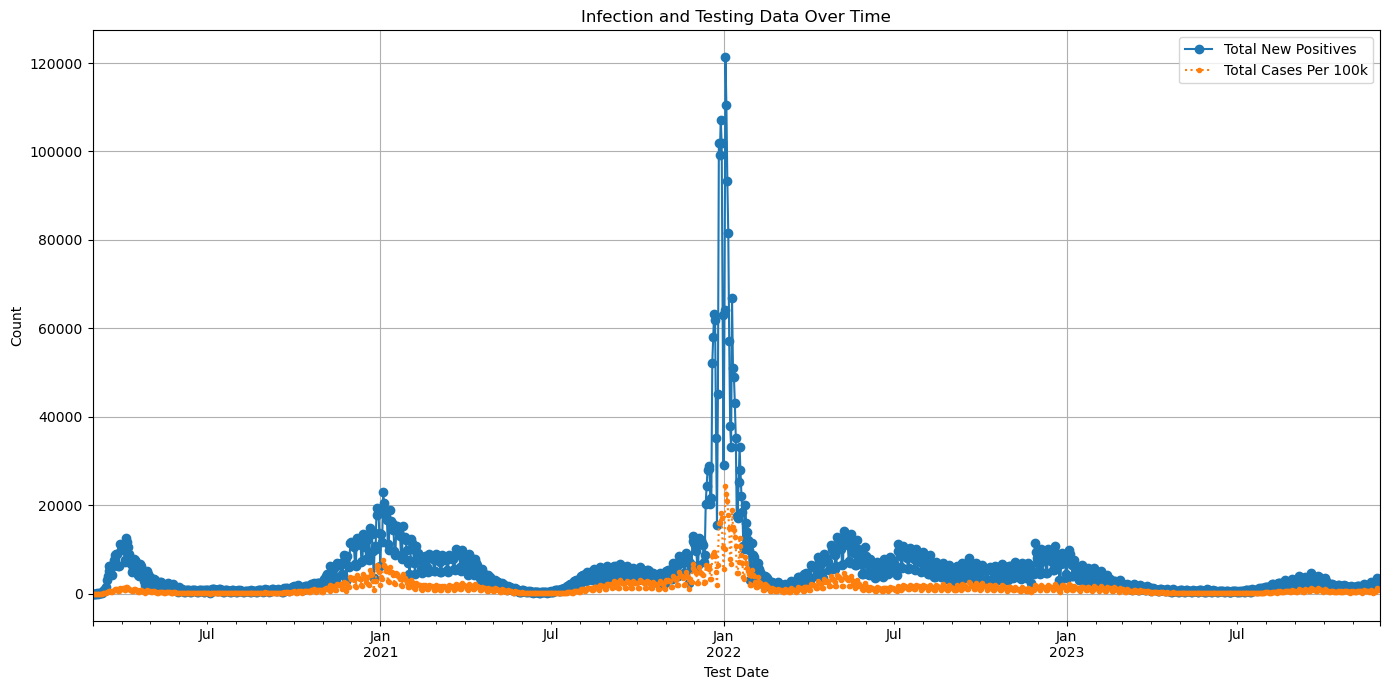

In [10]:
# Convert the 'Test Date' to datetime
testing['Test Date'] = pd.to_datetime(testing['Test Date'])

# Filter the STATEWIDE from data
filtered_data = testing[testing['Geography Level'] != 'STATEWIDE']
# Filter the REGION from data
filtered_data = filtered_data[filtered_data['Geography Level'] != 'REGION']

# Grouping by the date and summing the infection counts for that date
testing_dategrp = filtered_data.groupby('Test Date').sum()

plt.figure(figsize=(14,7))

testing_dategrp['Total New Positives'].plot(label="Total New Positives", linestyle="-", marker="o")
testing_dategrp['Total Cases Per 100k'].plot(label="Total Cases Per 100k", linestyle=":", marker=".")

plt.title('Infection and Testing Data Over Time')
plt.xlabel('Test Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows how the counts of New Positives and Total Number of Tests Performed have changed daily. There are a couple of notable peaks in the trend that appear around January of every years which can indicate a seasonal trend. For more context, January 1st 2021 was roughly two weeks after the the first vaccine was administered and there was an Omicron variant outbreak in January 2022.

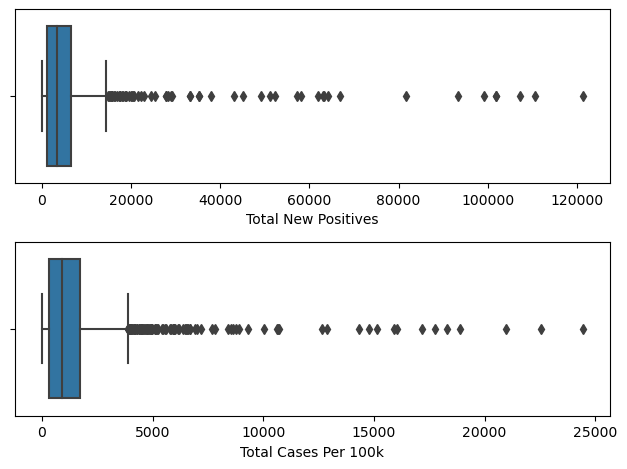

In [11]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
# Iterating through axes and names
for name, ax in zip(["Total New Positives","Total Cases Per 100k"], axes.flatten()):
    sns.boxplot(x=testing_dategrp[name], ax=ax)
plt.tight_layout()

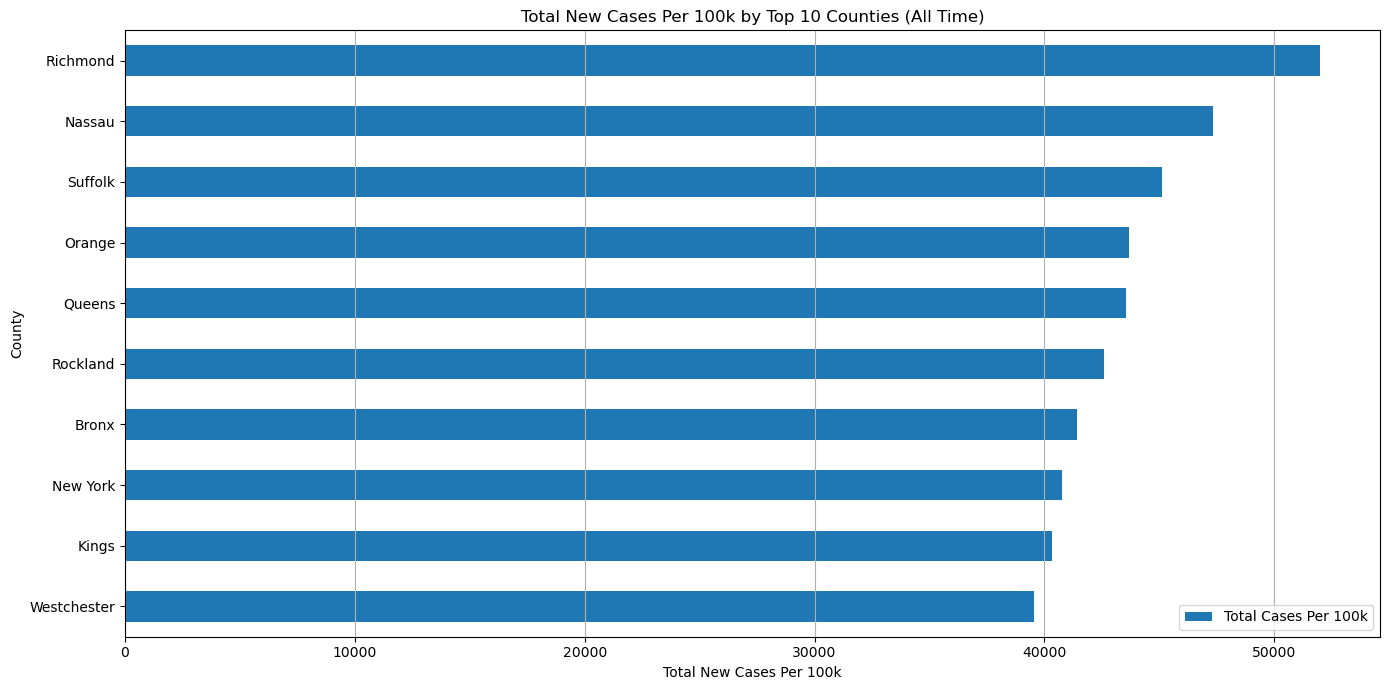

In [12]:
# Drop the 'Test Date' column before grouping
grouped_by_county = filtered_data.drop('Test Date', axis=1).groupby('Geography Description').sum()

# Plotting top 10 county
plt.figure(figsize=(14, 7))
grouped_by_county['Total Cases Per 100k'].nlargest(10).sort_values().plot(kind="barh", label="Total Cases Per 100k")

plt.title('Total New Cases Per 100k by Top 10 Counties (All Time)')
plt.xlabel('Total New Cases Per 100k')
plt.ylabel('County')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

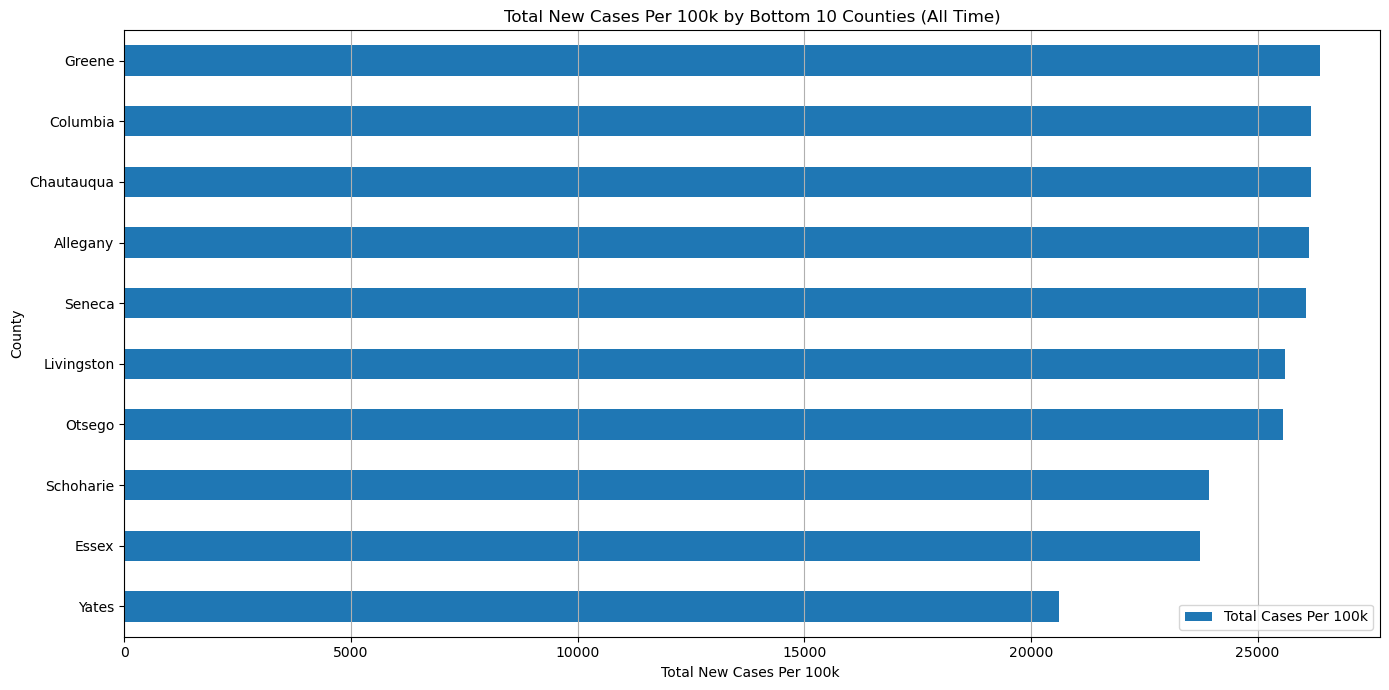

In [13]:
# Drop the 'Test Date' column before grouping
grouped_by_county = filtered_data.drop('Test Date', axis=1).groupby('Geography Description').sum()

# Plotting bottom 10 county
plt.figure(figsize=(14, 7))
grouped_by_county['Total Cases Per 100k'].nsmallest(10).sort_values().plot(kind="barh", label="Total Cases Per 100k")
plt.title('Total New Cases Per 100k by Bottom 10 Counties (All Time)')
plt.xlabel('Total New Cases Per 100k ')
plt.ylabel('County')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Unsurprisingly, the top counties with the highest new cases per capita of all time are located around New York City, a highly populated location. Meanwhile, bottom counties are further away from the metro area.

<a id='reinfection-dataset'></a>
## Reinfection Dataset
### Data Overview

In [14]:
reinfection.head(5)

,Begin Date of the Week,REDC Region,First Infections Count,Reinfections Count
0,08/14/2023,Capital Region,232,110
1,08/14/2023,Central New York,228,126
2,08/14/2023,Finger Lakes,262,120
3,08/14/2023,Long Island,1211,829
4,08/14/2023,Mid-Hudson,1081,571


In [15]:
reinfection.shape

(1370, 4)

In [16]:
reinfection["REDC Region"].unique()

array(['Capital Region', 'Central New York', 'Finger Lakes',
       'Long Island', 'Mid-Hudson', 'Mohawk Valley', 'New York City',
       'North Country', 'Southern Tier', 'Western New York'], dtype=object)

### Descriptive Statistics and Trends

In [17]:
reinfection.drop('Begin Date of the Week', axis=1).describe()

,First Infections Count,Reinfections Count
count,1370.000000,1370.000000
mean,4134.894161,474.747445
std,14311.752734,1363.531657
min,17.000000,0.000000
25%,503.750000,31.000000
50%,1222.000000,120.000000
75%,3466.250000,326.000000
max,308993.000000,24781.000000


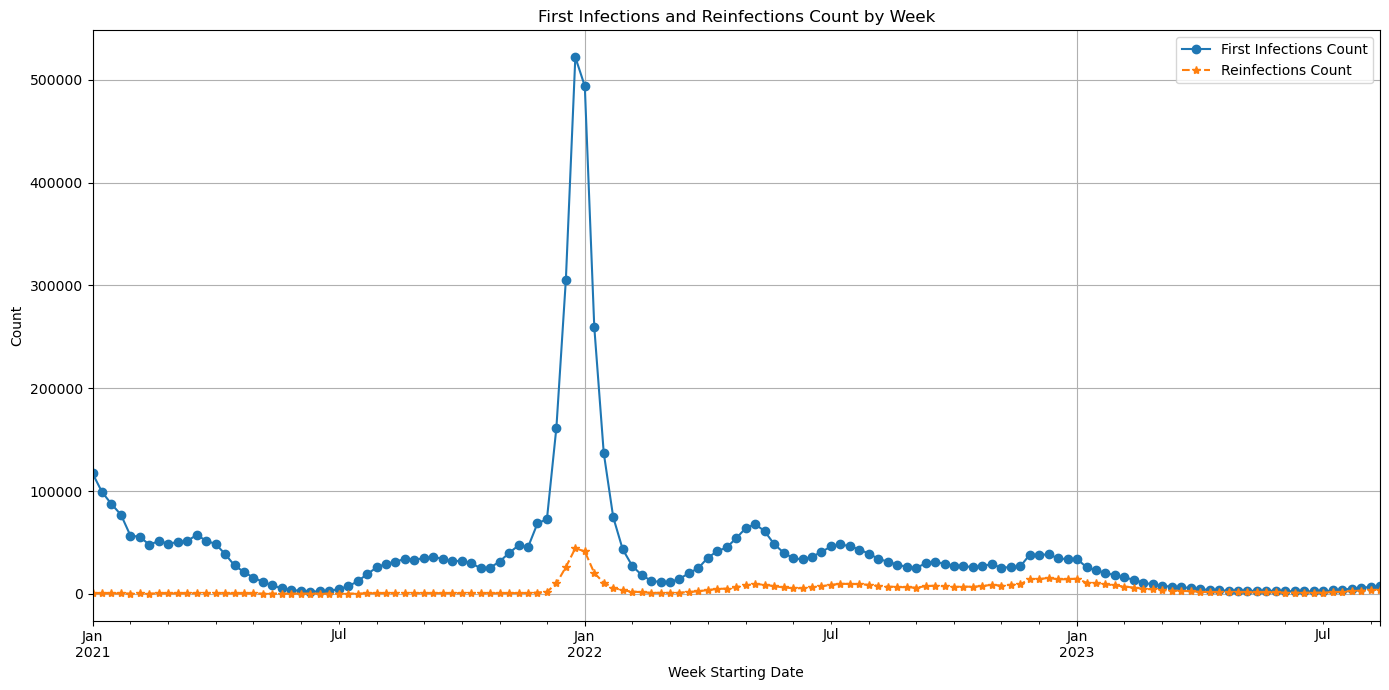

In [18]:
# Convert the 'Begin Date of the Week' to datetime
reinfection['Begin Date of the Week'] = pd.to_datetime(reinfection['Begin Date of the Week'])

# Grouping by the date and summing the infection counts for that date
reinfection_dategrp = reinfection.groupby('Begin Date of the Week').sum()

# Plotting the data
plt.figure(figsize=(14, 7))
reinfection_dategrp['First Infections Count'].plot(label="First Infections Count", linestyle="-", marker="o")
reinfection_dategrp['Reinfections Count'].plot(label="Reinfections Count", linestyle="--", marker="*")
plt.title('First Infections and Reinfections Count by Week')
plt.xlabel('Week Starting Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph above shows how the counts of first infections and reinfections have changed over the weeks. The date on the x-axis represents the start date of each week. The trends in this data appear to be very similar to the testing dataset.

<Figure size 1400x700 with 0 Axes>

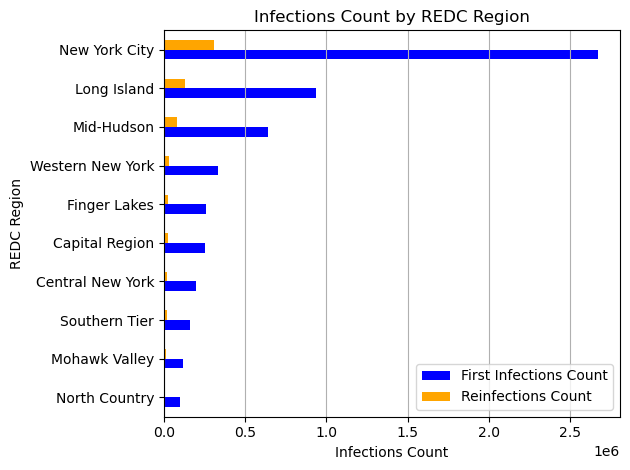

In [19]:
# Drop the 'Test Date' column before grouping
grouped_by_region = reinfection.drop('Begin Date of the Week', axis=1).groupby('REDC Region').sum()

# Plotting 
plt.figure(figsize=(14, 7))

# Sort the values by 'First Infections Count' for better visualization
sorted_data = grouped_by_region.sort_values(by='First Infections Count')

# Plot both 'First Infections Count' and 'Reinfections Count' in the same horizontal bar chart
sorted_data[['First Infections Count', 'Reinfections Count']].plot(kind="barh", color=["blue", "orange"])

plt.title('Infections Count by REDC Region')
plt.xlabel('Infections Count')
plt.ylabel('REDC Region')
plt.legend(['First Infections Count', 'Reinfections Count'])
plt.grid(axis='x')
plt.tight_layout()
plt.show()

New York City and the region in its vicinity appear to have the highest infection and reinfection count as expected of a big metropolitan area. 

<a id='vaccination-dataset'></a>
## Vaccination Dataset
### Data Overview

In [20]:
vaccination.head(5)

,Region,County,First Dose,Series Complete,Report as of
0,Capital Region,Albany,72,3,12/14/2020
1,Western New York,Allegany,0,0,12/14/2020
2,New York City,Bronx,2,1,12/14/2020
3,Southern Tier,Broome,0,0,12/14/2020
4,Western New York,Cattaraugus,0,0,12/14/2020


In [21]:
vaccination.shape

(64108, 5)

In [22]:
vaccination["Region"].unique()

array(['Capital Region', 'Western New York', 'New York City',
       'Southern Tier', 'Central New York', 'North Country', 'Mid-Hudson',
       'Mohawk Valley', 'Finger Lakes', 'Long Island'], dtype=object)

In [23]:
vaccination["County"].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### Descriptive Statistics & Trends

In [24]:
vaccination.drop('Report as of', axis=1).describe()

,First Dose,Series Complete
count,6.410800e+04,6.410800e+04
mean,2.265476e+05,1.945679e+05
std,4.368241e+05,3.837995e+05
min,0.000000e+00,0.000000e+00
25%,2.739075e+04,2.304825e+04
50%,5.323200e+04,4.548200e+04
75%,1.583462e+05,1.354768e+05
max,2.261842e+06,2.014844e+06


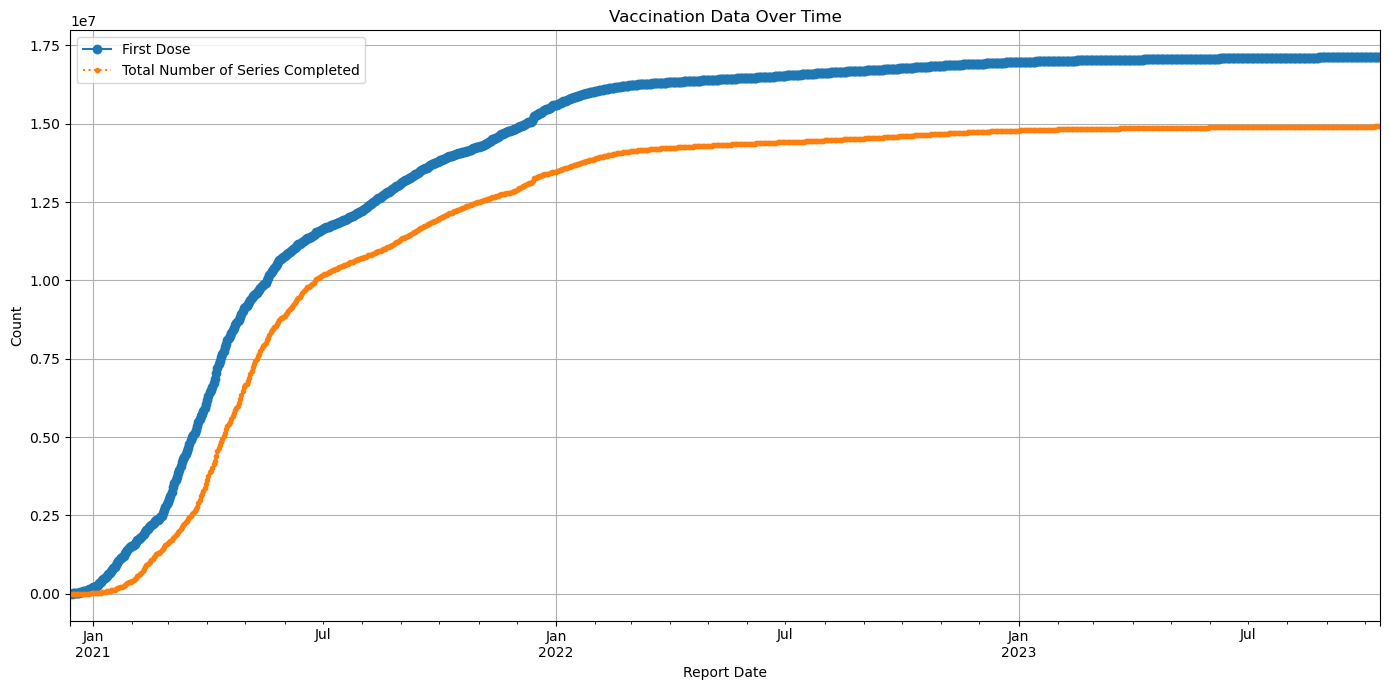

In [25]:
# Convert the 'Report as of' to datetime
vaccination['Report as of'] = pd.to_datetime(vaccination['Report as of'])

# Grouping by the date and summing the vaccination counts for that date
vaccination_dategrp = vaccination.groupby('Report as of').sum()

plt.figure(figsize=(14,7))

vaccination_dategrp['First Dose'].plot(label="First Dose", linestyle="-", marker="o")
vaccination_dategrp['Series Complete'].plot(label="Total Number of Series Completed", linestyle=":", marker=".")

plt.title('Vaccination Data Over Time')
plt.xlabel('Report Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph above shows the vaccincation rates have changed daily. For context, the first vaccine administered was on December 14th, 2020 (WashingtonPost). It appears that the vaccincation rate dramatically increased between January 2021 and January 2022, the same period we have observed unusual upticks in infection rate. The vaccination rate after slowed down a lot after January 2022.

<a id='sentiment-dataset'></a>
## Sentiment Dataset
### Data Overview

In [26]:
sentiment.head(5)

,id,score,month_year,file_name,year,month,geography,day,date
0,1.240000e+18,0.136364,2020_03,2020_march20_march21.csv,2020,3,United States,19,3/19/2020
1,1.240000e+18,0.000000,2020_03,2020_march20_march21.csv,2020,3,United States,19,3/19/2020
2,1.240000e+18,-0.006250,2020_03,2020_march20_march21.csv,2020,3,Pakistan,19,3/19/2020
3,1.240000e+18,0.275000,2020_03,2020_march20_march21.csv,2020,3,South Africa,19,3/19/2020
4,1.240000e+18,0.000000,2020_03,2020_march20_march21.csv,2020,3,Congo Brazzaville,19,3/19/2020


In [27]:
# Convert the 'date' to datetime
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [28]:
sentiment.shape

(515883, 9)

In [29]:
sentiment["geography"].value_counts()

geography
United States                          181205
United Kingdom                          66568
Canada                                  44689
India                                   25532
Australia                               10830
                                        ...  
Mauritania                                  1
Guernsey                                    1
French Southern and Antarctic Lands         1
Turkmenistan                                1
New Caledonia                               1
Name: count, Length: 223, dtype: int64

### Descriptive Statistics & Trends

In [30]:
sentiment['score'].describe()

count    509084.000000
mean          0.135569
std           0.257652
min          -1.000000
25%           0.000000
50%           0.041667
75%           0.267273
max           1.000000
Name: score, dtype: float64

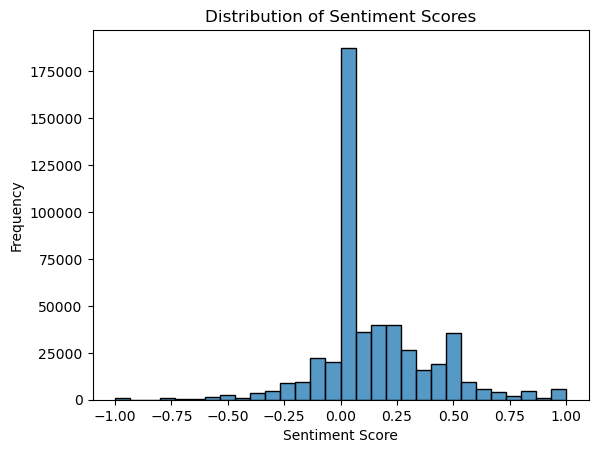

In [31]:
sns.histplot(sentiment['score'], bins=30, kde=False, edgecolor='black')

# Set plot labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

# Show the plot
plt.show()

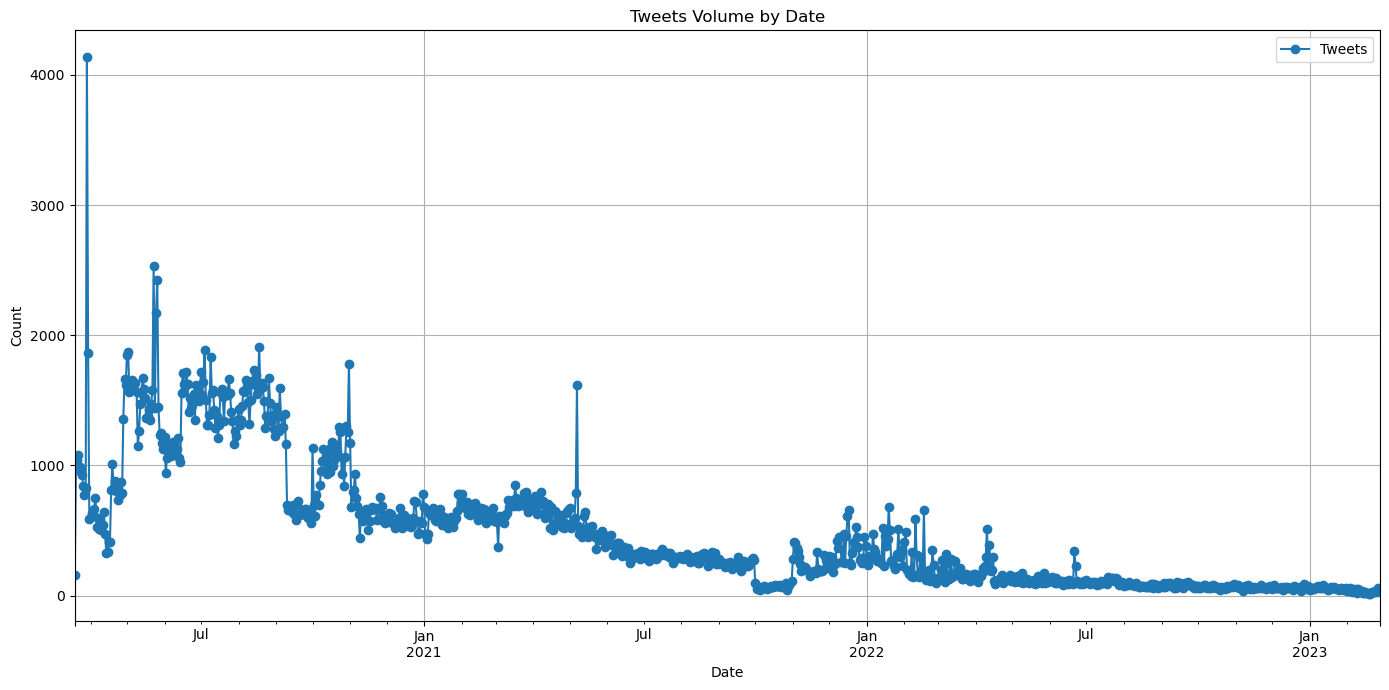

In [32]:
# Grouping by the date and counts for that date
sentiment_dategrp = sentiment.groupby('date').count()

plt.figure(figsize=(14,7))

sentiment_dategrp['id'].plot(label="Tweets", linestyle="-", marker="o")

plt.title('Tweets Volume by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

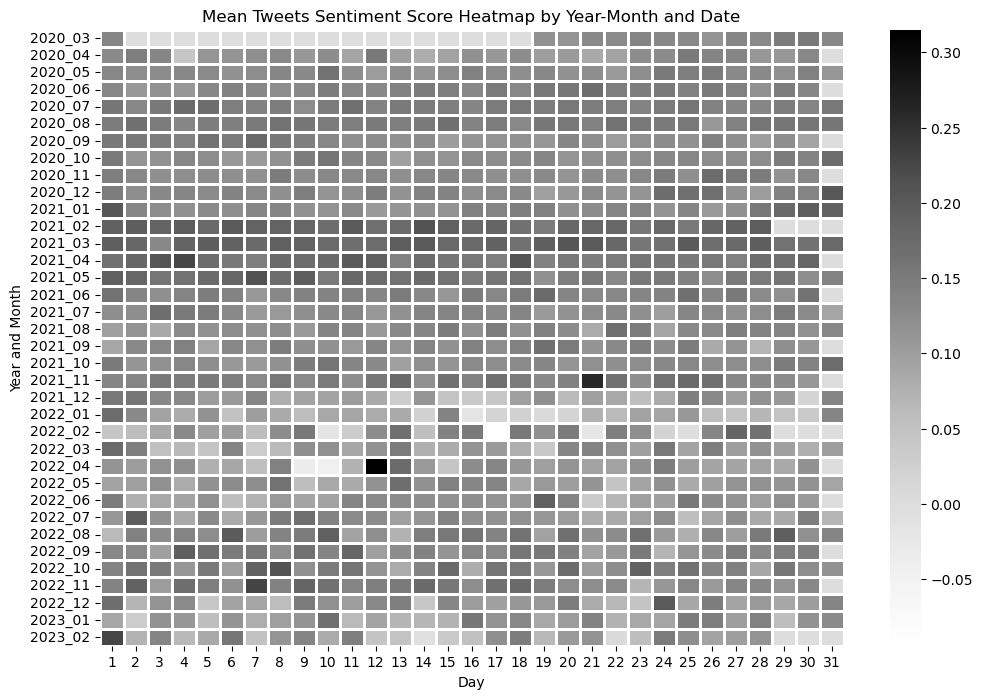

In [33]:
sentiment.loc[:, "day"] = sentiment["date"].dt.day
heatmap_data1 = sentiment.groupby(['month_year','day'])['score'].mean().reset_index()
heatmap_pivot = heatmap_data1.pivot(index='month_year', columns= 'day', values="score")
heatmap_pivot = heatmap_pivot.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap = 'Greys', linewidths=1)
plt.xlabel('Day')
plt.ylabel('Year and Month')
plt.title('Mean Tweets Sentiment Score Heatmap by Year-Month and Date')
plt.show()

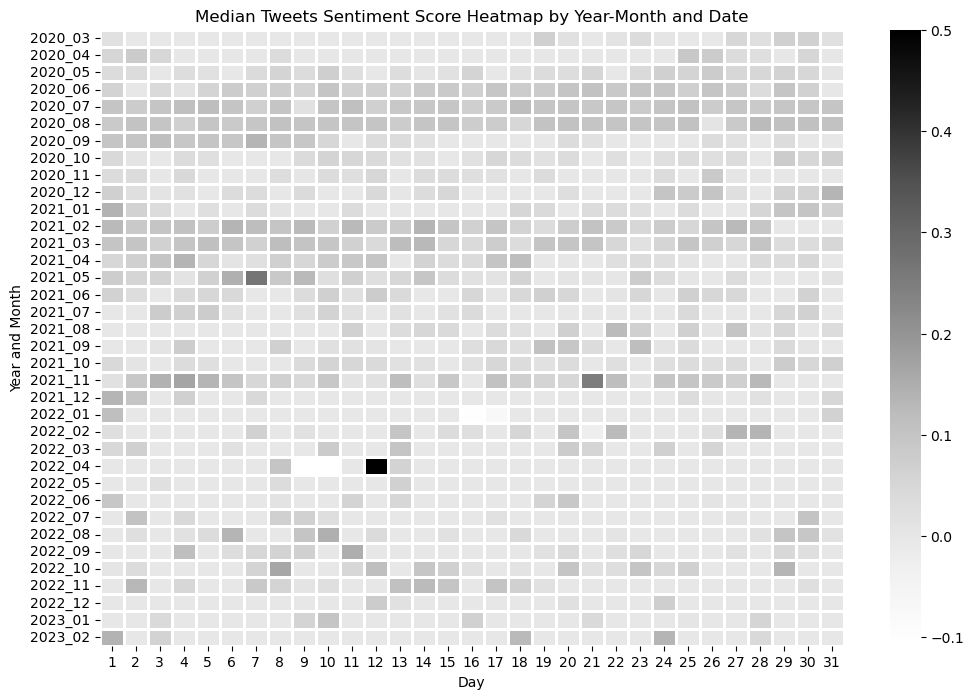

In [34]:
heatmap_data1 = sentiment.groupby(['month_year','day'])['score'].median().reset_index()
heatmap_pivot = heatmap_data1.pivot(index='month_year', columns= 'day', values="score")
heatmap_pivot = heatmap_pivot.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap = 'Greys', linewidths=1)
plt.xlabel('Day')
plt.ylabel('Year and Month')
plt.title('Median Tweets Sentiment Score Heatmap by Year-Month and Date')
plt.show()

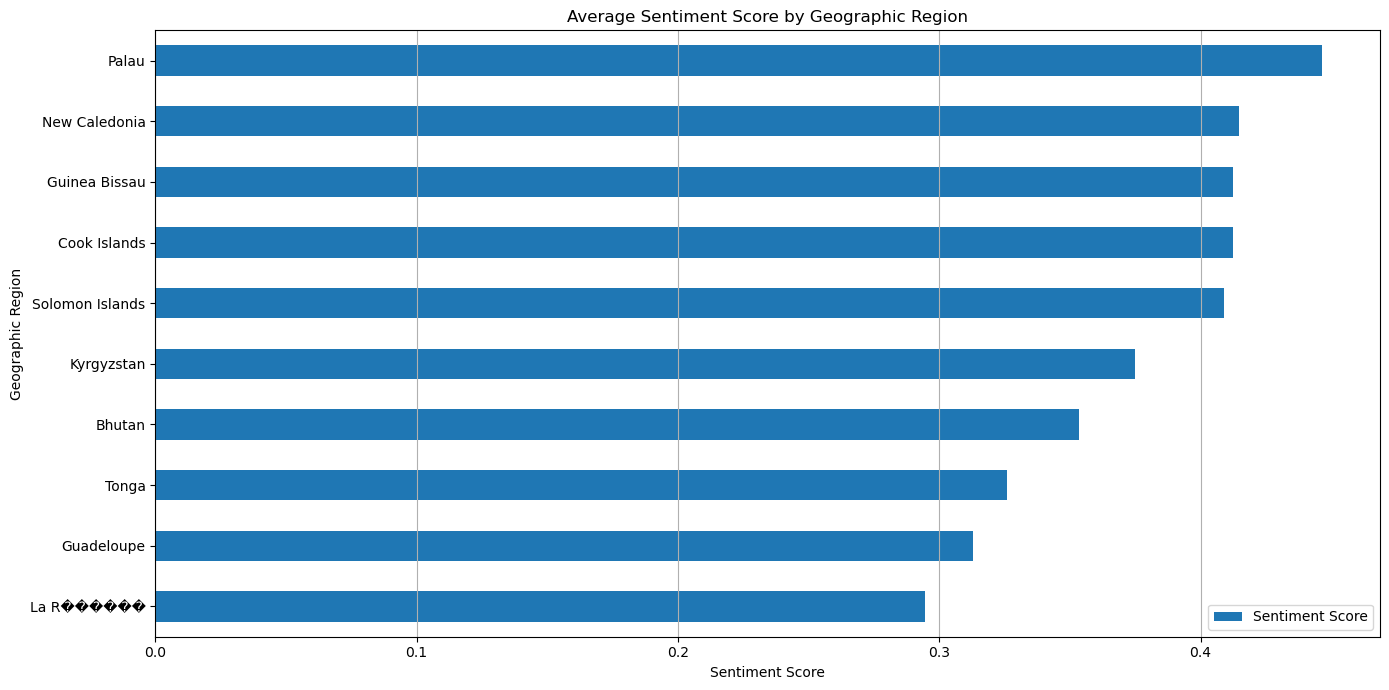

In [35]:
# Subset needed columns before grouping
sentiment_sub = sentiment[["score","geography"]]
grouped_by_geo = sentiment_sub.groupby('geography').mean()

# Plotting 
plt.figure(figsize=(14, 7))
grouped_by_geo["score"].nlargest(10).sort_values().plot(kind="barh", label="Sentiment Score")

plt.title('Average Sentiment Score by Geographic Region')
plt.xlabel('Sentiment Score')
plt.ylabel('Geographic Region')
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves determining the sentiment or emotion expressed in a piece of text, such as a review, comment, or social media post. Sentiment analysis aims to categorize the sentiment as positive, negative, or neutral, providing insights into the subjective opinions or attitudes conveyed in the text. A sentiment score is a numerical representation assigned to the sentiment of the text, ranging from -1 to 1 in this case, with values indicating the intensity or polarity of the expressed sentiment.

Overall, it looks like the sentiment score data is normally distributed but we need to take the time period into account, especially given that the volume of tweets regarding this topic decreases over time. By observing the heat maps, we can see that the mean score is fairly uniform over time while the median score fluctates and even includes some outliers. While the median score helps us identify trend overtime easier, we should use the mean sentiment when modeling the data for predictions later.

### Sentiment within USA

Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. This result is often encountered in social-science and medical-science statistics (Wikipedia). 

Before we continue with further advanced analysis, we should compare and contrast the sentiment trends within the USA with the overall sample.

In [36]:
# Filter only USA 
USA_sentiment = sentiment[sentiment['geography'] == 'United States']

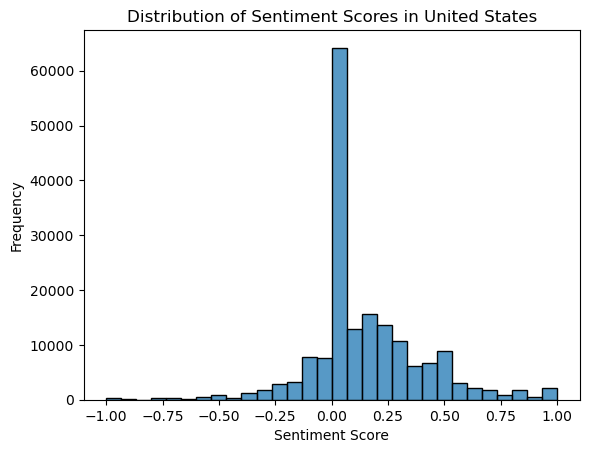

In [37]:
sns.histplot(USA_sentiment['score'], bins=30, kde=False, edgecolor='black')

# Set plot labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores in United States')

# Show the plot
plt.show()

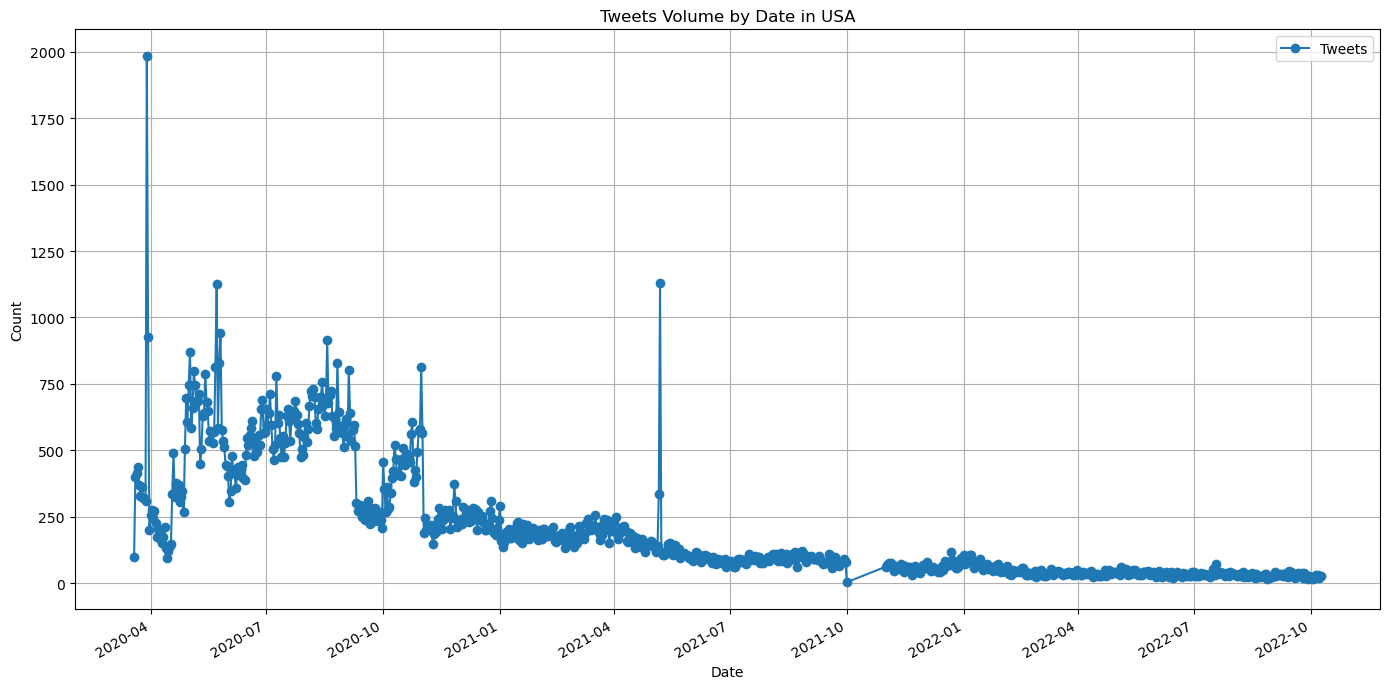

In [38]:
# Grouping by the date and counts for that date
sentimentUSA_dategrp = USA_sentiment.groupby('date').count()

plt.figure(figsize=(14,7))

sentimentUSA_dategrp['id'].plot(label="Tweets", linestyle="-", marker="o")

plt.title('Tweets Volume by Date in USA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

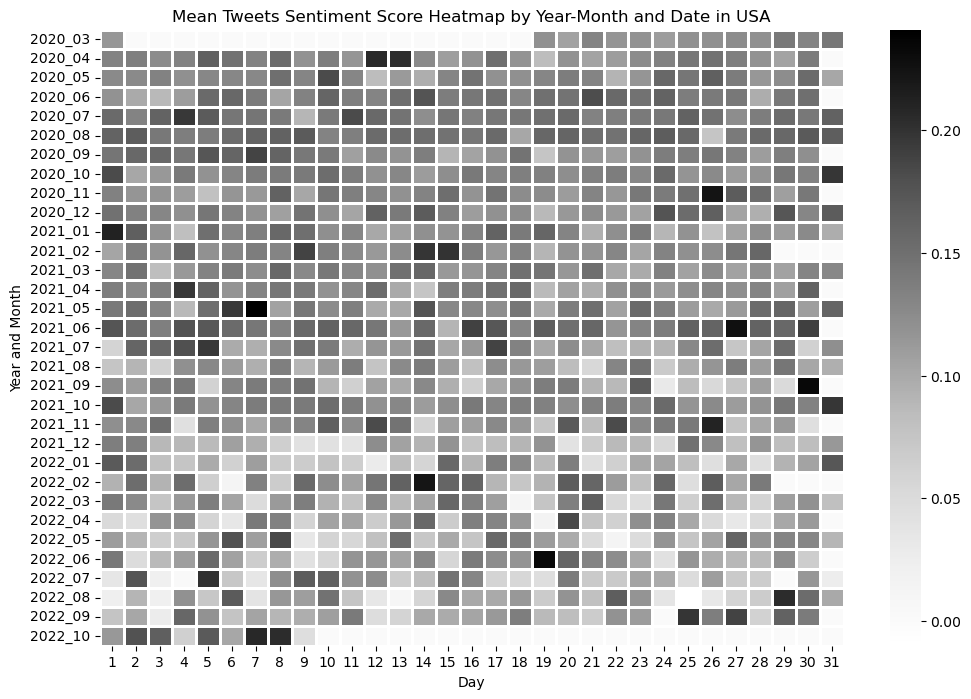

In [39]:
heatmap_data1 = USA_sentiment.groupby(['month_year','day'])['score'].mean().reset_index()
heatmap_pivot = heatmap_data1.pivot(index='month_year', columns= 'day', values="score")
heatmap_pivot = heatmap_pivot.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap = 'Greys', linewidths=1)
plt.xlabel('Day')
plt.ylabel('Year and Month')
plt.title('Mean Tweets Sentiment Score Heatmap by Year-Month and Date in USA')
plt.show()

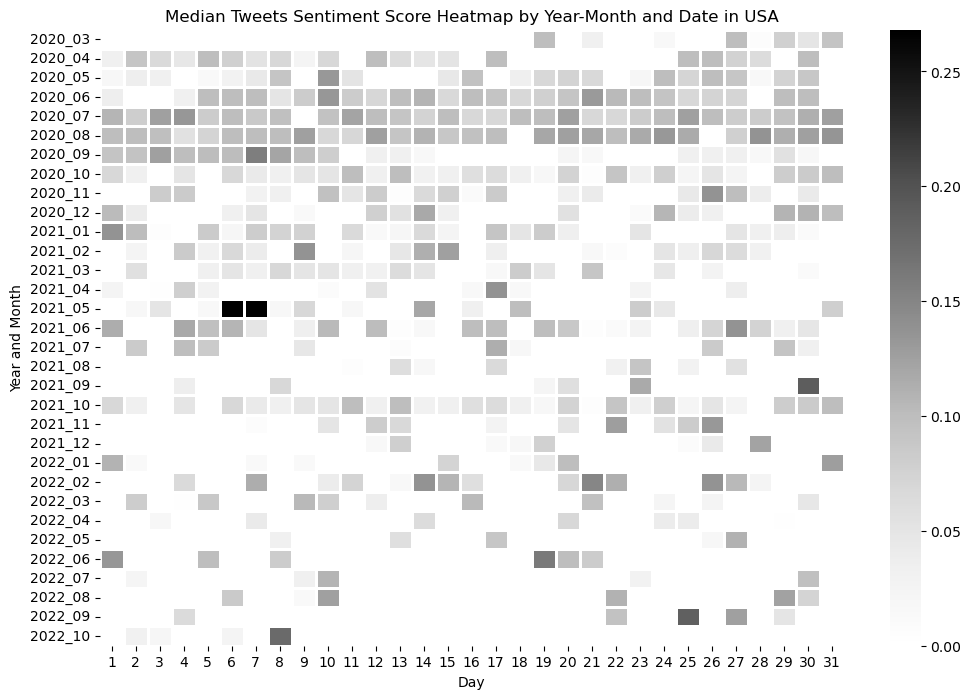

In [40]:
heatmap_data1 = USA_sentiment.groupby(['month_year','day'])['score'].median().reset_index()
heatmap_pivot = heatmap_data1.pivot(index='month_year', columns= 'day', values="score")
heatmap_pivot = heatmap_pivot.fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap = 'Greys', linewidths=1)
plt.xlabel('Day')
plt.ylabel('Year and Month')
plt.title('Median Tweets Sentiment Score Heatmap by Year-Month and Date in USA')
plt.show()

It is more noticeable in this version that the sentiment is trending downward as time goes on. But overall, the sentiment patterns and trends do not appear to differ greatly within the USA and the overall sample data. Therefore, we will not have to use the sentiment from only within the USA and can safely test whether the global sentiment on COVID-19 have influence an effect on infection rate in NYS. 

<a id='feature-engineering'></a>
# Feature Engineering

In this section, we will focus on dimension reduction and tranforming data for more advanced analysis in the next section.

### 1. Aggregate testing by county

In [41]:
from datetime import timedelta

# Create a copied view of the data
testing_county = filtered_data

# Add a new column 'vaccine' based on the condition
testing_county['vaccine'] = 'N'
testing_county.loc[testing_county['Test Date'] >= '2020-12-14', 'vaccine'] = 'Y'
testing_county.rename(columns={'Total Cases Per 100k': 'new_cases_per100k'}, inplace=True)

#calulate days before vaccination

days_difference = (pd.to_datetime('2020-12-14') - testing_county['Test Date'].min()).days

#find date from number days after vaccination
target_date = pd.to_datetime('2020-12-14') + timedelta(days=days_difference)

# Subset data for a balanced dataset needed for A/B Testing
testing_county_balanced = testing_county[(testing_county['Test Date'] >= testing_county['Test Date'].min()) & 
                                         (testing_county['Test Date'] <= target_date)]

# Blocking the data on Test Date to account for the vaccination campaign roll-up and dosage

#6 months prior:2020-06-17 to 2020-07-17 (30 days duration)
#30 days prior:2020-11-13 to 2020-12-13 (30 days duration)
#30 days after:2021-01-13 to 2021-02-12 (30 days duration)
#6 months after:2021-06-12 to 2021-07-12 (30 days duration)
#12 months after:2021-12-14 to 2022-01-14 (30 days duration)

testing_county6mop = testing_county[(testing_county['Test Date'] >= pd.to_datetime('2020-06-17')) & (testing_county['Test Date'] <= pd.to_datetime('2020-06-17')+timedelta(days=30))]
testing_county1mop = testing_county[(testing_county['Test Date'] >= pd.to_datetime('2020-11-13')) & (testing_county['Test Date'] <= pd.to_datetime('2020-11-13')+timedelta(days=30))]
testing_county1moa = testing_county[(testing_county['Test Date'] >= pd.to_datetime('2021-01-13')) & (testing_county['Test Date'] <= pd.to_datetime('2021-01-13')+timedelta(days=30))]
testing_county6moa = testing_county[(testing_county['Test Date'] >= pd.to_datetime('2021-06-12')) & (testing_county['Test Date'] <= pd.to_datetime('2021-06-12')+timedelta(days=30))]
testing_county12moa = testing_county[(testing_county['Test Date'] >= pd.to_datetime('2021-12-14')) & (testing_county['Test Date'] <= pd.to_datetime('2021-12-14')+timedelta(days=30))]

#Adding factors
testing_county6mop.loc[:, "Month"]  = "6 months prior"
testing_county1mop.loc[:, "Month"]  = "1 month prior"
testing_county1moa.loc[:, "Month"]  = "1 month after"
testing_county6moa.loc[:, "Month"]  = "6 months after"
testing_county12moa.loc[:, "Month"]  = "12 months after"

#concatinate the data
result1 = pd.concat([testing_county6mop, testing_county1mop], ignore_index=True)
result2 = pd.concat([result1, testing_county1moa], ignore_index=True)
result3 = pd.concat([result2, testing_county6moa], ignore_index=True)
result_df = pd.concat([result3, testing_county12moa], ignore_index=True)

C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\1943984263.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_county6mop.loc[:, "Month"]  = "6 months prior"
C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\1943984263.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_county1mop.loc[:, "Month"]  = "1 month prior"
C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\1943984263.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### 2. Merging all datasets by date

In [42]:
# Use only the STATEWIDE data from testing
testing_state = testing[testing['Geography Description'] == 'STATEWIDE']

# Grouping by the date for vaccination
vaccination_date_state = vaccination.groupby(['Report as of']).sum()
vaccination_date_state = vaccination_date_state[["First Dose","Series Complete"]]

# Grouping by the date for reinfection
reinfection_date_state = reinfection.groupby(['Begin Date of the Week']).sum()
reinfection_date_state = reinfection_date_state[["First Infections Count","Reinfections Count"]]


# Grouping by the date for sentiment
sentiment_no_na = sentiment
#Convert datetime type
sentiment_no_na.loc[:, "date"] = pd.to_datetime(sentiment_no_na['date'])
# Remove rows where column date is blank in sentiment
sentiment_no_na.dropna(subset=['date'], inplace=True)
# Remove unwanted columns in sentiment
sentiment_no_na = sentiment_no_na[["id",'score','date']]
#Calculate weekly begin date
sentiment_no_na['Begin Date of the Week'] = sentiment_no_na['date'] - pd.to_timedelta(sentiment_no_na['date'].dt.dayofweek, unit='D')
# Grouping by the date for sentiment
sentiment_grp = sentiment_no_na.groupby(['Begin Date of the Week']).mean()
# Remove unwanted columns in sentiment
sentiment_grp = sentiment_grp[["id",'score']]

C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\3975394662.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_no_na['Begin Date of the Week'] = sentiment_no_na['date'] - pd.to_timedelta(sentiment_no_na['date'].dt.dayofweek, unit='D')


In [43]:
# merging the 4 datasets together for prediction models
merged_all1 = pd.merge(testing_state, vaccination_date_state, left_on='Test Date', right_on='Report as of', how='left')
merged_all1 = merged_all1.drop(['Geography Level','Geography Description'],axis=1)

# Step 1: Calculate weekly total for merged dataset
merged_all1['Begin Date of the Week'] = merged_all1['Test Date'] - pd.to_timedelta(merged_all1['Test Date'].dt.dayofweek, unit='D')
merged_all2 = merged_all1.drop('Test Date',axis=1).groupby('Begin Date of the Week').sum().reset_index()


# Step 2: Merge datasets based on the beginning of the week date
merged_2a = pd.merge(merged_all2, reinfection_date_state, left_on='Begin Date of the Week', right_on='Begin Date of the Week', how='left')
merged_final = pd.merge(merged_2a, sentiment_grp, left_on='Begin Date of the Week', right_on='Begin Date of the Week', how='left')


In [44]:
# Remove rows with blank or null values in data
merged_final_nona = merged_final.dropna()
merged_final_nona

,Begin Date of the Week,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen,First Dose,Series Complete,First Infections Count,Reinfections Count,id,score
45,2021-01-04,117725,602.41,576.44,96228,492.41,21497,110.00,2654010.0,243996.0,117209.0,516.0,1.350000e+18,0.123956
46,2021-01-11,99567,509.49,538.85,81559,417.35,18008,92.15,4657334.0,686256.0,99102.0,465.0,1.350000e+18,0.121174
47,2021-01-18,87825,449.43,467.58,71158,364.13,16667,85.30,7224503.0,1256408.0,87365.0,460.0,1.350000e+18,0.130872
48,2021-01-25,77496,396.55,421.09,62784,321.27,14712,75.27,9682545.0,2293825.0,77045.0,451.0,1.354774e+18,0.156956
49,2021-02-01,56996,291.65,310.68,46289,236.87,10707,54.79,11583234.0,3583638.0,56668.0,328.0,1.360000e+18,0.188285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2023-01-30,26444,135.33,144.17,20603,105.42,5841,29.89,119044868.0,103719229.0,18118.0,8325.0,1.620000e+18,0.117969
154,2023-02-06,23101,118.21,122.93,18107,92.65,4994,25.57,119088238.0,103758860.0,16010.0,7091.0,1.620000e+18,0.108081
155,2023-02-13,19870,101.68,107.08,15627,79.97,4243,21.72,119127031.0,103794329.0,13730.0,6135.0,1.629726e+18,0.065094
156,2023-02-20,15902,81.36,87.31,12447,63.69,3455,17.67,119159880.0,103823715.0,10923.0,4979.0,1.630000e+18,0.094993


<a id='modeling'></a>

# Modeling

We will be doing two analyses in this section:

1. Factor Analysis: The goal is to evaluate infection rate across regions and the presence of COVID-19 vaccine on the infection rate.
2. Effect Evaluation & Prediciting New COVID-19 Cases: The goal is to estimate what external factors determine infection rate and whether we can use those factors to accurately forecast future infections.

The dependent variable in these analyses will be 'Total Cases Per 100k'. This is the rate of new positive tests per hundred thousand people which indicates community transmission/spread of the disease. We can reference the table below to understand how the spread severity is determined based on cases per capita.

| How rapidly is COVID-19 spreading in the community? | Number of positive COVID-19 cases per 100,000 per day |
| --- | --- |
| Red: Uncontrolled substantial spread | 5.1 or more cases |
| Orange: Controlled substantial spread | 2.6 to 5.0 cases |
| Yellow: Moderate spread | 0.5 to 2.5 cases |
| Green: Low spread | Less than 0.5 cases |

Table from NebraskaMed.com

<a id='analysis-1-Factor-Analysis'></a>

## Analysis 1: Factor Analysis

What communities are disproportionately affected? Does the vaccine actually have an effect on infection rate in NYS? What is the extent of its effect? 

To answer these questions, we will be performing 2 tests:

1. One for differences in the means of the infection rates between counties over time. Because we are not interested in the timeframe, we will be assigning the Test Date variable as a random effect while fitting the Mixed Linear Model.

2. Another one for differences in the means of the infection rates between 5 different time periods that are relative to December 14th 2020 - the date when first vaccine was administered on. Because we are observing the same population in different timeframe, this is considered a repeated measures experiment. So, we need to account for the variability between different counties that is not explained by the vaccine in the model. This is done by assigning the Geography Description variable as a random effect while fitting the Mixed Linear Model.

- 6 months prior:2020-06-17 to 2020-07-17 (30 days duration)
- 30 days prior:2020-11-13 to 2020-12-13 (30 days duration)
- 30 days after:2021-01-13 to 2021-02-12 (30 days duration)
- 6 months after:2021-06-12 to 2021-07-12 (30 days duration)
- 12 months after:2021-12-14 to 2022-01-14 (30 days duration)

Unfortunately, the sentiment score data only has country level data, therefore we are unable to incorporate this variable in this analysis.

### Factor Analysis 1:   Fixing data on county level and blocking on test date

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [46]:
testing_county_balanced.rename(columns={'Geography Description': 'geo'}, inplace=True)

md1 = smf.mixedlm("new_cases_per100k ~ geo", testing_county_balanced, groups = testing_county_balanced['Test Date'])
mdf1 = md1.fit()

#print(mdf1.summary())

# Filter only statistically significant results
significant_results = mdf1.pvalues[mdf1.pvalues < 0.05].index
filtered_summary = mdf1.summary().tables[1].loc[significant_results]

print(filtered_summary)

C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\3621083825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_county_balanced.rename(columns={'Geography Description': 'geo'}, inplace=True)


                      Coef. Std.Err.       z  P>|z|  [0.025  0.975]
Intercept            16.594    0.996  16.660  0.000  14.642  18.546
geo[T.Bronx]          7.461    0.802   9.303  0.000   5.889   9.033
geo[T.Broome]         3.997    0.802   4.983  0.000   2.425   5.569
geo[T.Cayuga]         1.983    0.802   2.473  0.013   0.411   3.555
geo[T.Chemung]        4.367    0.802   5.444  0.000   2.795   5.939
geo[T.Clinton]       -3.570    0.802  -4.451  0.000  -5.142  -1.998
geo[T.Columbia]      -2.556    0.802  -3.187  0.001  -4.128  -0.984
geo[T.Cortland]       1.725    0.802   2.151  0.032   0.153   3.297
geo[T.Delaware]      -4.041    0.802  -5.039  0.000  -5.613  -2.469
geo[T.Dutchess]       3.807    0.802   4.747  0.000   2.235   5.379
geo[T.Erie]           2.664    0.802   3.321  0.001   1.092   4.236
geo[T.Essex]         -6.935    0.802  -8.647  0.000  -8.507  -5.363
geo[T.Franklin]      -3.419    0.802  -4.263  0.000  -4.991  -1.847
geo[T.Fulton]         1.843    0.802   2.298  0.

In [47]:
print(mdf1.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: new_cases_per100k
No. Observations: 35774   Method:             REML             
No. Groups:       577     Scale:              185.5833         
Min. group size:  62      Log-Likelihood:     -145543.4796     
Max. group size:  62      Converged:          Yes              
Mean group size:  62.0                                         
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            16.594    0.996 16.660 0.000 14.642 18.546
geo[T.Allegany]      -0.943    0.802 -1.176 0.240 -2.515  0.629
geo[T.Bronx]          7.461    0.802  9.303 0.000  5.889  9.033
geo[T.Broome]         3.997    0.802  4.983 0.000  2.425  5.569
geo[T.Cattaraugus]   -0.696    0.802 -0.868 0.386 -2.268  0.876
geo[T.Cayuga]         1.983    0.802  2.473 0.013  0.

### Interpretations

**Fixed Effects - what we are mainly interested in:**

Intercept: The intercept of the model is 16.594 which means that if the county is Albany, the expected new cases per 100,000 population is about 17 cases.

An example of how to interpret the other effects:

geo[T.Richmond]: The coefficient is 15.275 which means that if the county is Richmond, the new cases per 100,000 population is approximately 15 cases higher than Albany.


**Random Effects:**

Group Var: This represents the variance of the random effect associated with the date. Approximately 387 cases is the extent to which the new cases per 100,000 population vary over time, after accounting for the fixed effects.

**Explanation**

There are 62 counties in NYS, based on this model, only 44 counties (listed above) are statistically significant (p-value < 0.05). The counties that are not statistically significant have no difference to Albany or the intercept. 

The 5 counties that have the largest positive effect on the COVID-19 spread in descending order are Richmond, Rockland, Suffolk, Nassau, and Orange.

The 5 counties that have the largest negative effect on the COVID-19 spread in descending order are Essex, Yates, Tompkins, Washington, Schoharie (Schoharie ties with Otsego, Delaware, Jefferson, Clinton).


Since the new cases per capita seem to peaked in January 2021 and January 2022 which would most likely skew the result, we should split the data into different time blocks to help isolate the trends from the vaccination effect. 

### Factor Analysis 2: Blocking data on county and time period levels

In [48]:
# Run LMER county level with 5 different time periods
#6 months prior:2020-06-17 to 2020-07-17 (30 days duration)
#30 days prior:2020-11-13 to 2020-12-13 (30 days duration)
#30 days after:2021-01-13 to 2021-02-12 (30 days duration)
#6 months after:2021-06-12 to 2021-07-12 (30 days duration)
#12 months after:2021-12-14 to 2022-01-14 (30 days duration)

md = smf.mixedlm("new_cases_per100k ~ Month", result_df, groups=result_df["Geography Description"])
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   new_cases_per100k
No. Observations:     9610      Method:               REML             
No. Groups:           62        Scale:                4270.7450        
Min. group size:      155       Log-Likelihood:       -53876.0477      
Max. group size:      155       Converged:            Yes              
Mean group size:      155.0                                            
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------
Intercept                 45.364    2.866  15.827 0.000  39.746  50.982
Month[T.1 month prior]    -7.944    2.108  -3.768 0.000 -12.076  -3.812
Month[T.12 months after] 136.265    2.108  64.639 0.000 132.134 140.397
Month[T.6 months after]  -43.825    2.108 -20.789 0.000 -47.956 -39.693
Month[T.6

<a id='Factor-Analysis-Interpretations'></a>

### Factor Analysis Result Interpretations

Both the fixed effects and the random effects are statistically significant (p-value < 0.05).

**Fixed Effects - what we are mainly interested in:**

Intercept: The intercept of the model is 45.364 which means that 1 month after December 14th 2020, the expected new cases per 100,000 population is approximately 45 cases.

Month[T.6 months prior]: The coefficient is -42.920 which means that 6 months prior to December 14th 2020, the expected new cases per 100,000 population during this period is approximately 43 cases lower than period of 1 month after December 14th 2020.

Month[T.1 month prior]: The coefficient is -7.944 which means that 1 month prior to December 14th 2020, the expected new cases per 100,000 population during this period is approximately 8 cases lower than period of 1 month after December 14th 2020.

Month[T.6 months after]: The coefficient is -43.825 which means that 6 months after December 14th 2020, the expected new cases per 100,000 population during this period is approximately 44 cases lower than period of 1 month after December 14th 2020.

Month[T.12 months after]: The coefficient is 136.265 which means that 12 months after December 14th 2020, the expected new cases per 100,000 population during this period is approximately 136 cases higher than period of 1 month after December 14th 2020.

**Random Effects:**

Group Var: This represents the variance of the random effect associated with the counties. Approximately 372 cases is the extent to which the new cases per 100,000 population vary across different counties, after accounting for the fixed effects (the intercept and the time period).

**Explanation**

Now, we can see that the initial vaccines seem to have an effect on the spread of the virus in the population. The infection rate in '6 months prior' group shows gives us an idea of the spread early on in the pandemic then it spread appears to rise considerably by '1 month prior'. 

In '6 months after' group, we can see significant improvement in the virus spread thanks to the increase in vaccination rate and possibly benefits of rate of completing the vaccination series. Unfortunately, the benefit does not seem to extend beyond this as the spread in '12 months after' group is larger than we have seen before. This can be explained by the change in season and the emergence of the Omicron variance. 


<a id='analysis-2-effect-evaluation-prediciting-new-COVID-19-Cases'></a>

## Analysis 2: Effect Evaluation & Prediciting New COVID-19 Cases

To evaluate the effect of the sentiment score and other variables on New Cases Per 100k, we need to fit a regression model. This analysis helps to understand the relationship between the independent variable (sentiment score) and the dependent variable (New Cases Per 100k).

We settle on linear regression first, because it is the simplest model and the model results allow ease of interpreting independent variables. Afterwards, we will also attempt to predict COVID-19 cases with a more advanced model. This will give us a good comparison of the models and evaluate the effects better.

<a id='Linear-Regression-Assumption-Checks'></a>
### Linear Regression Assumption Checks

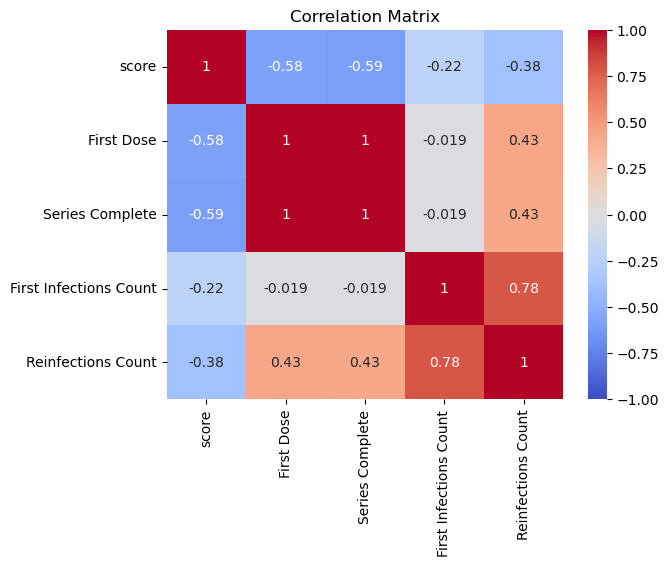

In [49]:
# No Multicollinearity: Check for multicollinearity among predictors
correlation_matrix = merged_final_nona[[ 'score', 'First Dose', 'Series Complete','First Infections Count','Reinfections Count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Multicollinearity assumption is violated so we are taking out Series Complete and First Infections Count.

C:\Users\Surf-ace\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Surf-ace\AppData\Local\Temp\ipykernel_3196\1664086491.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


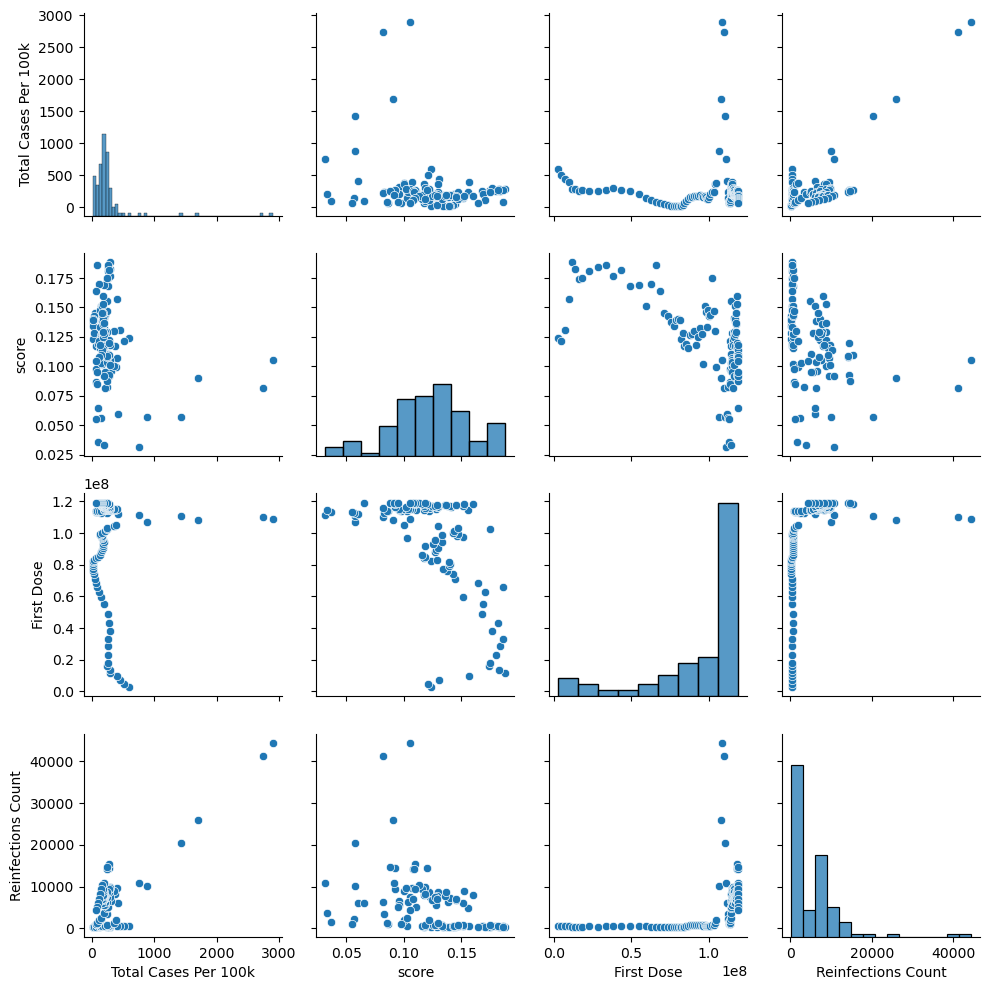

In [50]:
# Check Assumptions for Multiple Regression
# Linearity: Check scatterplots for linearity between predictors and the response variable
sns.pairplot(merged_final_nona[['Total Cases Per 100k', 'score', 'First Dose','Reinfections Count']])
plt.tight_layout()
plt.show()

Linearity assumption is not violated however sentiment score and vaccination count appear to have poor correlation with the Total Cases Per 100k.

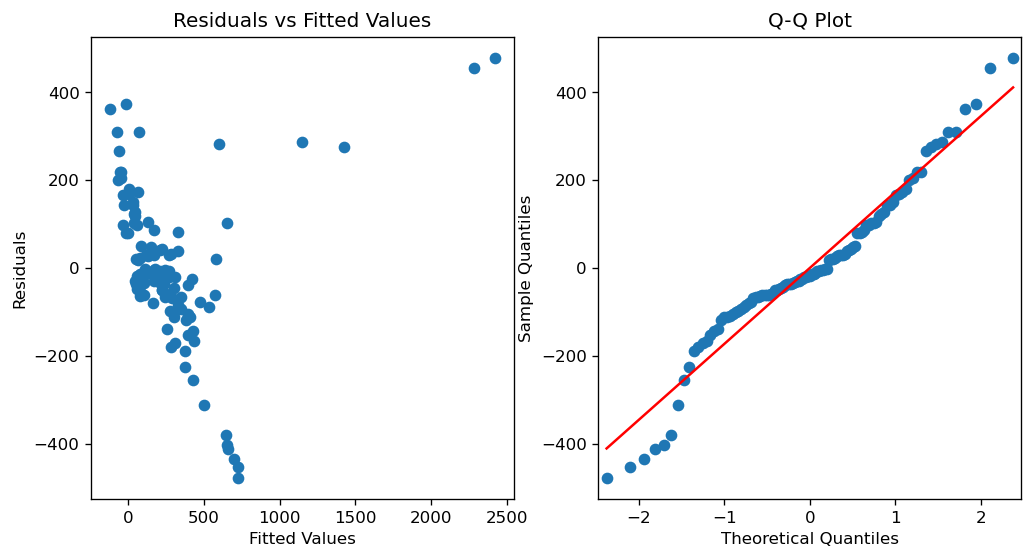

In [51]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

model = sm.OLS(merged_final_nona['Total Cases Per 100k'], sm.add_constant(merged_final_nona[[ 'score', 'First Dose','Reinfections Count']]))
results = model.fit()
residuals = results.resid

fig, axes = plt.subplots(1, 2)
# Independence
axes[0].scatter(results.fittedvalues, residuals)
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values')


# Homoscedasticity: Check if residuals are approximately normally distributed
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot')

plt.show()

Independence assumption ensures that the observations are independent. However, we know that this is violated since we are observing the same populations in different time frame. Therefore, we can ignore this for now.

Homoscedasticity assumption checks for constant variance of residuals and is somewhat acceptable given the independence 

Given these information, linear regression is not a great model to accurately describe the extent to which 'score', 'First Dose', and 'Reinfections Count' can explain 'Total Cases Per 100k'. However, we can still fit the model to get the general size and direction of the effect if they are statistically significant. 

<a id='Fitting-Linear-Regression-Model'></a>

### Fitting Linear Regression Model

Because we are only interested in measuring the effects of the external variables on the infection rate, we will split the data 80-20 randomly, rather than based on a specific date.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target variable (y)
features = sm.add_constant(merged_final_nona[['score', 'First Dose','Reinfections Count']])
#sm.add_constant() is used to prepare the input matrix for a multiple regression model by 
#adding a column of ones, ensuring the model includes an intercept term.

target_variable = merged_final_nona['Total Cases Per 100k']

# Perform an 80-20 random split
train_data, test_data, train_target, test_target = train_test_split(features, target_variable, test_size=0.2, random_state=42)

# 'random_state' is used to ensure reproducibility.

# Fit Multiple Regression Model
model = sm.OLS(train_target, train_data)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Total Cases Per 100k   R-squared:                       0.851
Model:                              OLS   Adj. R-squared:                  0.845
Method:                   Least Squares   F-statistic:                     163.2
Date:                  Tue, 12 Dec 2023   Prob (F-statistic):           2.19e-35
Time:                          19:40:11   Log-Likelihood:                -589.13
No. Observations:                    90   AIC:                             1186.
Df Residuals:                        86   BIC:                             1196.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [53]:
# Predict on the Testing Set
train_pred = results.predict(train_data)
test_pred = results.predict(test_data)

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

train_mae = mean_absolute_error(y_true=train_target,y_pred=train_pred)
#squared True returns MSE value, False returns RMSE value.
train_mse = mean_squared_error(train_target, y_pred=train_pred)#default=True
train_rmse = mean_squared_error(y_true=train_target,y_pred=train_pred,squared=False)
train_r2 = r2_score(train_target, train_pred)

test_mae = mean_absolute_error(y_true=test_target,y_pred=test_pred)
#squared True returns MSE value, False returns RMSE value.
test_mse = mean_squared_error(y_true=test_target,y_pred=test_pred) #default=True
test_rmse = mean_squared_error(y_true=test_target,y_pred=test_pred,squared=False)
test_r2 = r2_score(test_target, test_pred)


print("Train MAE:",train_mae)
print("Train MSE:",train_mse)
print("Train RMSE:",train_rmse)
print('Train R-squared:', train_r2)
print("Test MAE:",test_mae)
print("Test MSE:",test_mse)
print("Test RMSE:",test_rmse)
print('Test R-squared:', test_r2)

Train MAE: 120.27584939327463
Train MSE: 28393.030008937305
Train RMSE: 168.50231455068297
Train R-squared: 0.8505579048906882
Test MAE: 137.35773312153967
Test MSE: 37462.80910078079
Test RMSE: 193.55311700094316
Test R-squared: 0.4796385909266998


<a id='Linear-Regression-Interpretations'></a>
### Linear Regression Interpretations

**Effects**

All the independent variables are statistically significant (p-value < 0.05), meaning they have an effect on new cases per 100,000 people. About 85.1% variation in the dependent variable can be explained by the independent variables.

Intercept: The intercept of the model is 880.6362 which means that the expected new cases per 100,000 population is approximately 881 cases when all other variables are zero.

score: The coefficient is -2346.9638 which means that the expected new cases per 100,000 population decreased approximately by 2347 cases for each unit increase of the sentiment score. Given that the range of the score is [-1,1], the changes unit change would be by decimal points, therefore decrease should be around 24 cases (2347/100 = 23.47) for each 0.01 increase of the sentiment score.

First Dose: The coefficient is -6.565e-06 which means that the expected new cases per 100,000 population minimally decreased for each new vaccination dose.

Reinfection Count: The coefficient is 0.0575 which means that the expected new cases per 100,000 population minimally increased for each new reinfection.


**Explanation**

While all of the independent variables are significant, it appears that only score has a considerable contribution to the outcome of new cases per 100,000 population. It must be noted that the model is overfitted because the testing data performance metrics are worse than the training. For example, only 47.9% variation in the dependent variable can be explained by the independent variables. This means out-of-sample data predicitons are not very accurate.

Overall, the key takeaway from this model is that sentiment score does have an inverse relationship with the new cases per 100,000 population. And because linear regression poorly predicts new COVID-19 cases per 100,000 population, we need to address this issue as a time-series regression problem as the target variable is influenced by temporal patterns on top of the other external variables. Therefore, we will need to construct an AutoRegressive Integrated Moving Average with eXogenous variables (ARIMAX) model to capture autocorrelation and trends within the time series.


<a id='Time-Series-Forcasting-ARIMAX'></a>

### Time Series Forcasting - ARIMAX

Any 'non-seasonal' time series exhibiting patterns and not behaving as random white noise can be modeled with ARIMAX models.

An ARIMA model, the base model of ARIMAX, is defined by three terms: p, d, q.

Where,

p is the order of the AutoRegressive (AR) term. It tells us the number of lags required to fit an AR process to the stationary series.

q is the order of the Moving Average (MA) term, or the error of the lagged forecast. It tells us the number of error terms in a series to be regressed to reduce the differenced AR process residual to white noise.

d is the number of differencing required to make the time series stationary

With ARIMAX, we incorporate the X is the eXogenous variables

If a time series displays seasonal patterns, seasonal terms need to be added, transforming it into SARIMAX, an acronym for 'Seasonal ARIMAX.'

We will assess the performance of the model in terms of the R-squared (R2) score, Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Square Error (RMSE), and Akaike’s Information Criterion (AIC).


#### Selecting order of differencing (d)  

The ARIMA model is based on a regression model that performs optimally when predictors are uncorrelated and independent of each other. In this context, when d = 0, it indicates a stationary time series, meaning its properties do not depend on the time of observation.

To conduct forecasting using the ARIMAX model, a stationary time series is required. To assess time series stationarity, we can conduct the Augmented Dickey-Fuller (ADfuller) test—a hypothesis-based test. If the p-value is less than 0.05, we can consider the time series as stationary; if the p-value is greater than 0.05, the time series is deemed non-stationary.

In [54]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(merged_final_nona['Total Cases Per 100k'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.8601686745351826
2. P-Value :  0.002348344737299128
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 109
5. Critical Values :
	 1% :  -3.49181775886872
	 5% :  -2.8884437992971588
	 10% :  -2.5811201893779985


The null hypothesis of the ADF test is that the time series is non-stationary. Since the p-value of the test is less than the significance level (0.05), we can reject the null hypothesis and infer that the time series is indeed stationary. We do not need to use the SARIMAX model. Similarly, since we are not differencing the data before running the model, we do not need to difference the exogenous (explanatory) variables.

#### Selecting order of AR term (p) and order of MA term (q)

The next step is to identify if the model needs any AR terms and the amount of lag which we can find out by inspecting the Partial Autocorrelation (PACF) plot.

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

Just like how we looked at the PACF plot for the number of AR terms, we can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series. (machinelearningplus.com)

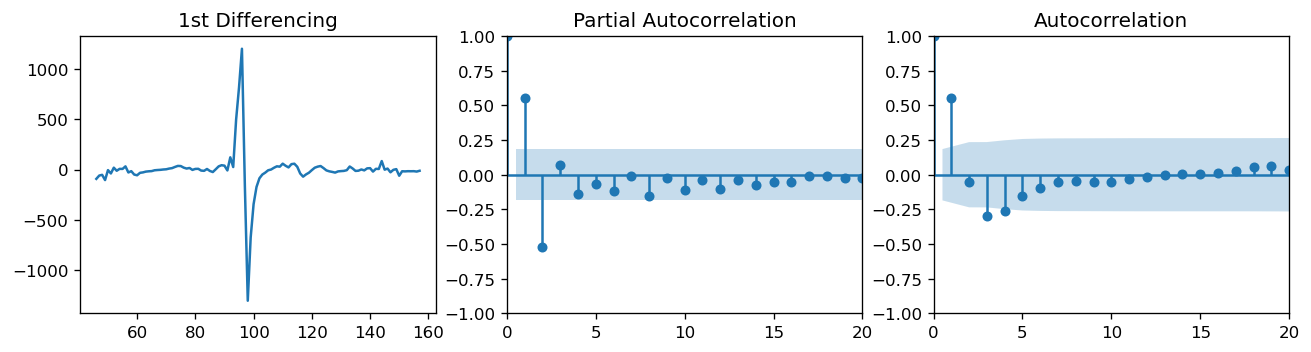

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(13,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 3)
axes[0].plot(merged_final_nona['Total Cases Per 100k'].diff()); axes[0].set_title('1st Differencing')

axes[1].set(ylim=(0,5),xlim=(0,20))
plot_pacf(merged_final_nona['Total Cases Per 100k'].diff().dropna(), ax=axes[1])

axes[2].set(ylim=(0,5),xlim=(0,20))
plot_acf(merged_final_nona['Total Cases Per 100k'].diff().dropna(), ax=axes[2])
plt.show()

You can observe that the PACF lag 1 is quite significant since is well above the significance line. But on looking at the the lag 2 which goes into the far negative zone fairly quick, which indicates, the series might have been over differenced. As for the ACF, we see significance up to lag 3 and lag 4 is barely significance, while lag 2 is insignificance. So to be conservative, we are going to fix the order of p as 1 and q as 1.

<a id='Fitting-ARIMAX-Model'></a>
### Fitting ARIMAX Model

In [56]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [57]:
# Split data into training and testing sets
train_data1 = merged_final_nona[merged_final_nona['Begin Date of the Week'] < '2022-01-01']
test_data1 = merged_final_nona[merged_final_nona['Begin Date of the Week'] >= '2022-01-01']
train_data1.set_index('Begin Date of the Week', inplace = True)
test_data1.set_index('Begin Date of the Week', inplace = True)
train_data1.index = pd.DatetimeIndex(train_data1.index.values, freq='W-MON')
test_data1.index = pd.DatetimeIndex(test_data1.index.values, freq='W-MON')

Since we want to find out the rate of infection while taking into account the temporal pattern, we will now conduct cross-validation split based on a specific date.

#### Trial 1: ARIMAX(1, 0, 1)

In [58]:
# Build ARIMAX model
exogenous_vars = ['score', 'First Dose','Reinfections Count']
y_train1 = train_data1['Total Cases Per 100k']
arimax_model = sm.tsa.ARIMA(y_train1, exog=train_data1[exogenous_vars], order=(1, 0, 1)) 
arimax_results = arimax_model.fit(method_kwargs={"warn_convergence": False})
arimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Total Cases Per 100k   No. Observations:                   52
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -266.560
Date:                  Tue, 12 Dec 2023   AIC                            547.119
Time:                          19:40:12   BIC                            560.778
Sample:                      01-04-2021   HQIC                           552.356
                           - 12-27-2021                                         
Covariance Type:                    opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                582.2612   8.34e-05   6.98e+06      0.000     582.261     582.261
score              -1480.2829   3.89e-05  -3.81e+07      0.000   -1480.283   -1480.283
First Dose         -3.144e-06   6.64e-07     -4.734      0.000   -4.45e-06   -1.84e-06
Reinfections Count     0.0632      0.001     60.554      0.000       0.061       0.065
ar.L1                  0.8696      0.071     12.273      0.000       0.731       1.008
ma.L1                  0.0924      0.193      0.480      0.631      -0.285       0.470
sigma2              1500.7591    3.2e-05   4.69e+07      0.000    1500.759    1500.759
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.73   Prob(JB):                         0.47
Heteroskedasticity (H):               2.39   Skew:                             0.06
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+23. Standard errors may be unstable.
"""

The AR and exogenous terms' p-value are less than 0.05, therefore the AR term and the respective X variables are significant. Because p-value of the MA term is non-significant, we will reduce the order to 0. 

#### Trial 2: ARIMAX(1, 0, 0) or AR(1)

In [59]:
arimax_model = sm.tsa.ARIMA(y_train1, exog=train_data1[exogenous_vars], order=(1, 0, 0))
arimax_results = arimax_model.fit(method_kwargs={"warn_convergence": False})
arimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Total Cases Per 100k   No. Observations:                   52
Model:                   ARIMA(1, 0, 0)   Log Likelihood                -267.237
Date:                  Tue, 12 Dec 2023   AIC                            546.474
Time:                          19:40:12   BIC                            558.181
Sample:                      01-04-2021   HQIC                           550.962
                           - 12-27-2021                                         
Covariance Type:                    opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                582.2612   5.41e-05   1.08e+07      0.000     582.261     582.261
score              -1480.2829   6.17e-06   -2.4e+08      0.000   -1480.283   -1480.283
First Dose         -3.142e-06   5.09e-07     -6.178      0.000   -4.14e-06   -2.14e-06
Reinfections Count     0.0632      0.001     84.014      0.000       0.062       0.065
ar.L1                  0.8515      0.048     17.608      0.000       0.757       0.946
sigma2              1514.8962   2.61e-06   5.81e+08      0.000    1514.896    1514.896
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.68   Prob(JB):                         0.29
Heteroskedasticity (H):               2.17   Skew:                             0.11
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+25. Standard errors may be unstable.
"""

Once the model has been fitted, we can check if does what we expect and if the assumptions we made are violated. To do this, we can use the plot_diagnostics method.

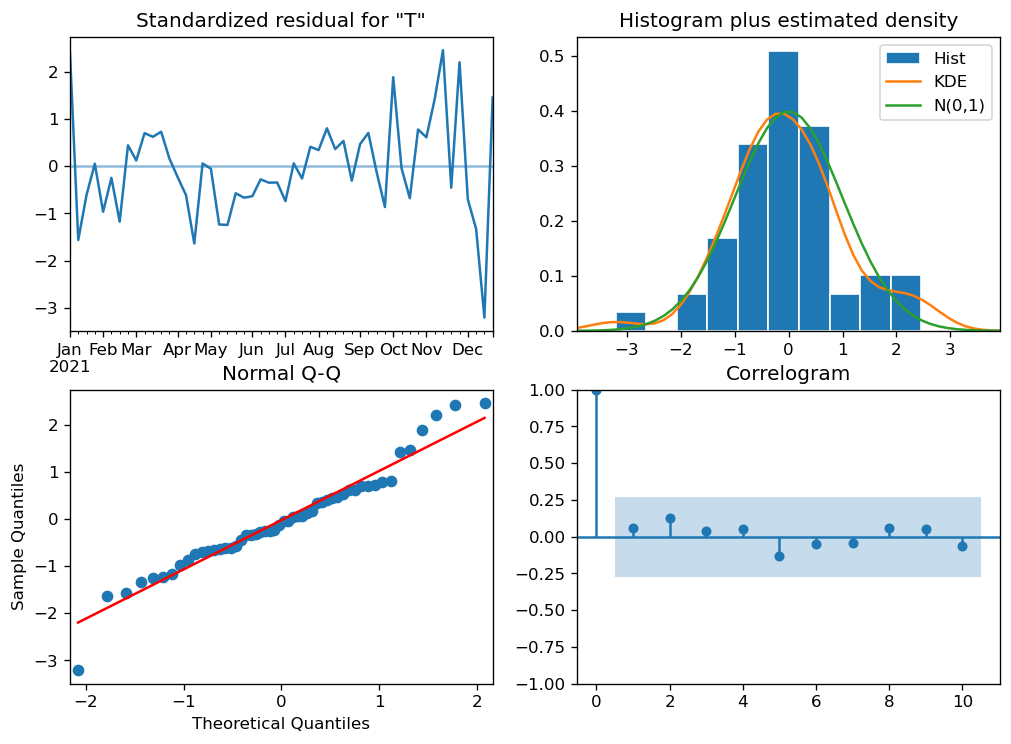

In [60]:
arimax_results.plot_diagnostics(figsize=(10, 7))
plt.show()

<a id='ARIMAX-Model-Interpretations'></a>
### ARIMAX Model Interpretations

**Plot Diagnostics**

- Top left: The residual errors seem to fluctuate around a mean of zero and have a somewhat uniform variance. Hence, it dos not exhibit any obvious seasonality.

- Top Right: The density plot suggest normal distribution with mean zero.

- Bottom left: The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) roughly follows the linear trend of samples taken from a standard normal distribution. The significant deviations toward the right end imply the distribution is somewhat skewed.

- Bottom Right: The Correlogram, aka, ACF plot shows whether the residual errors are autocorrelated. All autocorrelations are within the threshold limits, indicating that the residuals are behaving like white noise. We do not need to add more predictors to make the model more accurate.

**ARIMAX Results**

AR(1) means that the forecast values are regressed on the values of one previous period. In this case, that would be 1 week.

AIC was invented to match leave-one-out cross validation error, the lower the score the better the model. We can see that the AIC improved from trial 1 (547.119) to trial 2 (546.474). Also remember that the linear regression model was 1186, so AR(1) model is definitely a much better fit for this data.

One major disadvantage of ARIMAX is that the covariate coefficient is hard to interpret. The presence of lagged values of the dependent variable mean that the coefficient of the independent variables can only be interpreted conditional on the value of previous values of the response variable.

The coefficients are just calculated to account for the effects of those variables when the future forecast is calculated.

<a id='Cross-validation-and-Out-of-Sample-Forecast'></a>
### Cross-validation and Out-of-Sample Forecast

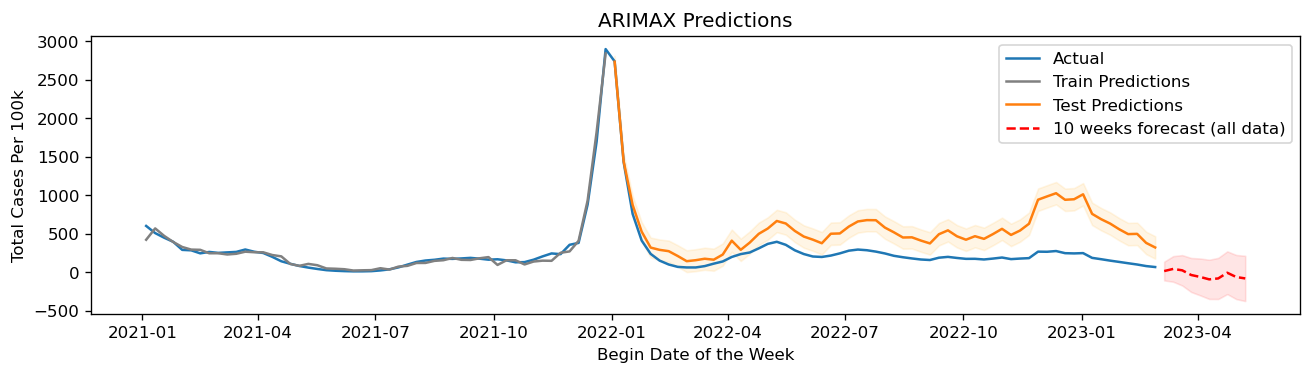

In [61]:
import numpy as np
#Predictions on the training set
train_predictions = arimax_results.predict(start=0, end=len(train_data1)-1, exog=train_data1[exogenous_vars])

#Test predictions: Start from end of training data to end of data sample
arimax_predictions = arimax_results.predict(start=len(train_data1), end=len(merged_final_nona)-1, exog=test_data1[exogenous_vars])
prd = arimax_results.get_prediction(start=len(train_data1), end=len(merged_final_nona)-1, exog=test_data1[exogenous_vars]).summary_frame()

#Prepare for out-of-model forecast - 10 weeks from 2023-02-27
merged_final_nona.set_index('Begin Date of the Week', inplace = True)
merged_final_nona.index = pd.DatetimeIndex(merged_final_nona.index.values, freq='W-MON')
arimax_fcst = sm.tsa.ARIMA(merged_final_nona['Total Cases Per 100k'], exog=merged_final_nona[exogenous_vars], order=(1, 0, 0))
arimax_fresults = arimax_fcst.fit(method_kwargs={"warn_convergence": False})

# Create a (10, 3) matrix with most recent data of 'score', 'First Dose','Reinfections Count'
num_rows = 10
matrix = np.zeros((num_rows, 3))
matrix[:, 0] = merged_final[merged_final['Begin Date of the Week'] < '2023-03-06']['score'].tail(10) #NA data after 2023-03-06 so we will use past data instead
matrix[:, 1] = merged_final[merged_final['Begin Date of the Week'] > '2023-02-27']['First Dose'].head(10)
matrix[:, 2] = merged_final[merged_final['Begin Date of the Week'] > '2023-02-27']['Reinfections Count'].head(10)

fcst = arimax_fresults.get_forecast(steps=10, exog=matrix).summary_frame()

# Plot actual vs predicted values
plt.plot(merged_final_nona.index, merged_final_nona['Total Cases Per 100k'], label='Actual')
plt.plot(train_data1.index, train_predictions, label='Train Predictions', linestyle='-',color = "grey")
plt.plot(test_data1.index, arimax_predictions, label='Test Predictions', linestyle='-')
plt.fill_between(prd.index, prd['mean_ci_lower'], prd['mean_ci_upper'], color='orange', alpha=0.1);
plt.plot(fcst.index, fcst['mean'], label='10 weeks forecast (all data)', linestyle='--', color = 'red')
plt.fill_between(fcst.index,fcst['mean_ci_lower'], fcst['mean_ci_upper'], color='red', alpha=0.1);
plt.xlabel('Begin Date of the Week')
plt.ylabel('Total Cases Per 100k')
plt.title('ARIMAX Predictions')
plt.legend()
plt.show()

In [62]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mse = mean_squared_error(y_true=actual,y_pred=forecast)   # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    r2 = r2_score(actual, forecast)
    return({'mape':mape, 'mae': mae, 
            'mse': mse, 'rmse':rmse, 
            'corr':corr, 'r2':r2})

print("Train metrics:",forecast_accuracy(train_predictions, train_data1['Total Cases Per 100k']))
print("Test metrics:",forecast_accuracy(arimax_predictions, test_data1['Total Cases Per 100k']))

Train metrics: {'mape': 0.28708785213498733, 'mae': 32.31700422674469, 'mse': 2103.569370428183, 'rmse': 45.864685439106445, 'corr': 0.9947896390011417, 'r2': 0.9895413472470677}
Test metrics: {'mape': 1.6008122768056308, 'mae': 298.938993523124, 'mse': 123106.64414665943, 'rmse': 350.86556420751725, 'corr': 0.8755556998935041, 'r2': 0.09616410166115863}


The test predictions show that the model is slightly overfitted when comparing the performance metrics. However, they roughly follow the same pattern as the actual values. Plus, we can see that the prediction and its confidence interval only stray from the actual data as time goes on, but the prediction and actual values appear to eventually converge at the end. Because of this, we can be 95% confidence that our prediction up to 4 months will be accurate and we are able to attempt to fit the entire data in the AR(1) model to forecast the next 10 weeks, which is out-of-sample prediction.

<a id='conclusion-recommendations'></a>
# Conclusion & Recommendations


## Models Summary

### Factor Analysis 1

| County  | New Cases per 100k (compared to baseline) | County      | New Cases per 100k (compared to baseline) |
|---------------------|--------------------------------------------|-------------|--------------------------------------------|
| Albany (Baseline)  | 17                                         | Cayuga      | 2                                          |
| Richmond           | 15                                         | Fulton      | 2                                          |
| Rockland           | 11                                         | Cortland    | 2                                          |
| Suffolk            | 11                                         | Livingston | -2                                         |
| Nassau             | 10                                         | Saratoga    | -2                                         |
| Orange             | 9                                          | Wayne       | -2                                         |
| Westchester        | 8                                          | Columbia    | -3                                         |
| Bronx              | 7                                          | Ontario     | -3                                         |
| Queens             | 7                                          | Madison     | -3                                         |
| Lewis              | 5                                          | Schuyler    | -3                                         |
| Kings              | 5                                          | Franklin    | -3                                         |
| Putnam             | 5                                          | Warren      | -3                                         |
| Chemung            | 4                                          | Seneca      | -3                                         |
| Broome             | 4                                          | Clinton     | -4                                         |
| Dutchess           | 4                                          | Jefferson   | -4                                         |
| Oneida             | 4                                          | Delaware    | -4                                         |
| Genesee            | 3                                          | Otsego      | -4                                         |
| Erie               | 3                                          | Schoharie   | -4                                         |
| Montgomery         | 2                                          | Washington  | -5                                         |
| Niagara            | 2                                          | Tompkins    | -6                                         |
| Monroe             | 2                                          | Yates       | -6                                         |
| Sullivan           | 2                                          | Essex       | -7                                         |


The model highlights significant disparities among counties, emphasizing the need for tailored interventions. Richmond, Rockland, and Suffolk show the siginificant positive virus spread compared to baseline, while Essex, Yates, and Tompkins suffer significantly less compared to baseline. Richmond (Staten Island) emerges as a county with the highest severity of virus spread, indicating a disproportionate burden of COVID-19. This insight can guide targeted interventions and resource allocation to address disparities effectively.


### Factor Analysis 2

| Time period              | New Cases per 100k (compared to baseline) |
|--------------------------|-------------------------------------------|
| 6 months prior           | - 43 cases                                |
| 1 month prior            | - 8 cases                                 |
| 1 month after (baseline) | 45 cases                                  |
| 6 months after           | - 44 cases                                |
| 12 months after          | + 136 cases                               |


The analysis supports the conclusion that the initial vaccines had an effect on reducing virus spread, evident in the decreased cases 6 months after vaccination initiation. However, challenges, such as seasonal factors and new variants, are apparent in the subsequent increase 12 months after. The model's incorporation of random effects acknowledges the heterogeneity in county-specific trends, emphasizing the need for a nuanced understanding of the vaccine's impact in different regions.

### Linear Regression Model

| Metric          | Train        | Test         |
|-----------------|--------------|--------------|
| MAE             | 120.28       | 137.36       |
| MSE             | 28393.03     | 37462.81     |
| RMSE            | 168.50       | 193.55       |
| R-squared       | 0.85         | 0.48         |

The Linear Regression model demonstrates good explanatory power in the training set (R-squared = 0.85) but exhibits a lower predictive accuracy in the test set (RMSE = 193.55). R-squared emphasizes variance explanation but doesn't ensure accurate predictions.


### ARIMAX Model AR(1)

| Metric  | Train         | Test          |
|---------|---------------|---------------|
| MAPE    | 0.29          | 1.60          |
| MAE     | 32.32         | 298.94        |
| MSE     | 2103.57       | 123106.64     |
| RMSE    | 45.86         | 350.87        |
| Corr (to Actual)    | 0.99          | 0.88          |
| R-squared       | 0.99          | 0.10          |



The ARIMAX model outperforms the Linear Regression model in predictive accuracy, as indicated by lower RMSE values for training (45.86). The model's ability to capture the percentage difference is evident in the MAPE values (0.29 for training), crucial for assessing prediction performance in time series contexts. The high correlation with actual values (0.99 for training, 0.88 for testing) emphasize its suitability for time series forecasting tasks.

It must be noted that the test performance metrics (RMSE and MAPE) are worse than the training dataset. And, this is most likely attributed to the length of time we are trying to predict. Based on the ARIMAX Predictions chart, we can see that short-term forecasts performed much better and the metrics are likely worsened from the predictions that happen after the 4 months point.

Nevertherless, the ARIMAX model, with its lower RMSE and MAPE values, demonstrates superior predictive accuracy over the Linear Regression model, aligning with the preference for RMSE in forecasting tasks and the relevance of MAPE in time series forecasting. The ARIMAX model proves effective in capturing the complex temporal patterns inherent in the data, making it a favorable choice for forecasting new cases per 100,000 population.

In conclusion, this study provides valuable insights into the COVID-19 situation in New York State. The findings can be used by policymakers, healthcare professionals, and the public to develop more effective strategies to control the spread of the virus and protect public health. The data analysis shows that COVID-19 is a complex problem with no easy solutions. It is important to consider a variety of factors, such as testing rates, reinfection rates, vaccination rates, and public sentiment, when developing public health strategies. We need to be flexible and adaptable in our response to the pandemic, as the virus is constantly changing.


## Recommendations

- Targeted Interventions:
Prioritize targeted interventions in counties with significant positive impacts, notably Richmond, Rockland, and Suffolk. Tailor strategies to address specific challenges in these regions, acknowledging variations in vaccination rates, healthcare infrastructure, and community dynamics.

- Temporal Considerations:
Acknowledge the temporal dynamics revealed in our analyses. Plan interventions with a nuanced understanding of seasonal variations and potential challenges posed by emerging variants. A flexible and adaptive approach will be crucial to address fluctuations in infection rates over time.

- Public Communication Strategies:
Devise effective public communication strategies to address concerns and combat misinformation. Leverage insights from social media sentiment analysis to tailor messages that resonate with the public. This proactive approach can enhance public understanding, trust, and adherence to health guidelines.

- Continued Monitoring and Research:
Establish ongoing monitoring systems to track the evolving landscape of COVID-19. Regularly update analyses to capture changing trends, emerging patterns, and the impact of evolving public health measures. This will enable timely adjustments to intervention strategies based on real-time data.

- Collaborative Research Efforts:
Foster collaboration between public health agencies, research institutions, and community organizations. Encourage joint efforts to conduct in-depth studies on the factors influencing COVID-19 dynamics. This collaborative approach can enhance the accuracy of predictions and provide a holistic understanding of the pandemic's impact.

- Capacity Building and Resource Allocation:
Strengthen healthcare infrastructure in counties identified as disproportionately affected. Allocate resources strategically to bolster medical facilities, testing capabilities, and vaccination centers. This proactive approach will enhance the region's capacity to manage and mitigate the impact of COVID-19.

- Scenario Planning:
Develop scenario-based planning that accounts for potential future challenges, including the introduction of new variants, changes in public behavior, and vaccine effectiveness over time. Anticipating diverse scenarios will enable policymakers to proactively address evolving challenges.

- Education and Outreach:
Implement targeted educational campaigns in regions with negative impacts to address potential vaccine hesitancy and improve public awareness. Collaborate with local community leaders and healthcare professionals to enhance outreach efforts and ensure accurate information dissemination.

- Policy Flexibility:
Maintain flexibility in policy implementation, allowing for agile responses to changing circumstances. Design policies that can be adjusted based on real-time data, ensuring a dynamic and responsive approach to the evolving nature of the pandemic.

<a id='references'></a>
# References

* https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/jvfi-ffup
* https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Reinfection-Data/7aaj-cdtu
* https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Vaccination-Data/duk7-xrni
* https://ieee-dataport.org/open-access/megageocov-extended
* https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset
* https://www.washingtonpost.com/nation/2020/12/14/first-covid-vaccines-new-york/
* https://en.wikipedia.org/wiki/Simpson%27s_paradox
* https://www.nebraskamed.com/COVID/how-to-calculate-covid-19-stats-for-your-area#positive_cases_per_capita
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
* https://ieeexplore.ieee.org/document/9377038
* https://otexts.com/fpp2/stationarity.html
* https://andrewcparnell.github.io/TSDA/slides/day_3/class_1_ARIMAX.pdf
